# Applied AI in Biomedicine project

**Introduction:**...

Project members:


*   Giovanni Dispoto
*   Francesco Romanò



# Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip -d /content/training_set

Archive:  /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip
  inflating: /content/training_set/S001_128.mat  
  inflating: /content/training_set/S001_128_ann.mat  
  inflating: /content/training_set/S001_128_rpk.mat  
  inflating: /content/training_set/S002_128.mat  
  inflating: /content/training_set/S002_128_ann.mat  
 extracting: /content/training_set/S002_128_rpk.mat  
  inflating: /content/training_set/S003_128.mat  
  inflating: /content/training_set/S003_128_ann.mat  
  inflating: /content/training_set/S003_128_rpk.mat  
  inflating: /content/training_set/S004_128.mat  
  inflating: /content/training_set/S004_128_ann.mat  
 extracting: /content/training_set/S004_128_rpk.mat  
  inflating: /content/training_set/S005_128.mat  
  inflating: /content/training_set/S005_128_ann.mat  
  inflating: /content/training_set/S005_128_rpk.mat  
  inflating: /content/training_set/S006_128.mat  
  inflating: /content/training_set/S006_128_ann.mat  
  inflating: /co

In [3]:
input_dir = "/content/training_set"

In [4]:
import os

# list the data present in the dataset
dirs = sorted(os.listdir(input_dir))
print(dirs)

['S001_128.mat', 'S001_128_ann.mat', 'S001_128_rpk.mat', 'S002_128.mat', 'S002_128_ann.mat', 'S002_128_rpk.mat', 'S003_128.mat', 'S003_128_ann.mat', 'S003_128_rpk.mat', 'S004_128.mat', 'S004_128_ann.mat', 'S004_128_rpk.mat', 'S005_128.mat', 'S005_128_ann.mat', 'S005_128_rpk.mat', 'S006_128.mat', 'S006_128_ann.mat', 'S006_128_rpk.mat', 'S007_128.mat', 'S007_128_ann.mat', 'S007_128_rpk.mat', 'S008_128.mat', 'S008_128_ann.mat', 'S008_128_rpk.mat', 'S009_128.mat', 'S009_128_ann.mat', 'S009_128_rpk.mat', 'S010_128.mat', 'S010_128_ann.mat', 'S010_128_rpk.mat', 'S011_128.mat', 'S011_128_ann.mat', 'S011_128_rpk.mat', 'S012_128.mat', 'S012_128_ann.mat', 'S012_128_rpk.mat', 'S013_128.mat', 'S013_128_ann.mat', 'S013_128_rpk.mat', 'S014_128.mat', 'S014_128_ann.mat', 'S014_128_rpk.mat', 'S015_128.mat', 'S015_128_ann.mat', 'S015_128_rpk.mat', 'S016_128.mat', 'S016_128_ann.mat', 'S016_128_rpk.mat', 'S017_128.mat', 'S017_128_ann.mat', 'S017_128_rpk.mat', 'S018_128.mat', 'S018_128_ann.mat', 'S018_128_r

In [5]:
# environment setup
from scipy.io import loadmat
import numpy as np, os, sys, joblib
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import pandas as pd
import random
import tensorflow as tf
import sklearn
from collections import Counter

#Setting random seed for reproducibility
#Remember to use always SEED for the functions that requires it (like Scikit models)
SEED = 1234
np.random.seed(SEED)
pd.core.common._random_stat = SEED
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [6]:
# Utility function to load data

def load_data(ecg_file):
  ecg = loadmat(ecg_file)
  rpk_file = ecg_file.replace('.mat', '_rpk.mat')
  rpk = loadmat(rpk_file)
  ann_file = ecg_file.replace('.mat', '_ann.mat')
  ann = loadmat(ann_file)
  return ecg, rpk, ann

# Preprocessing

In [7]:
train = ['S043_128.mat', 'S059_128.mat', 'S117_250.mat', 'S042_128.mat',
       'S004_128.mat', 'S039_128.mat', 'S050_128.mat', 'S002_128.mat',
       'S097_250.mat', 'S003_128.mat', 'S006_128.mat', 'S047_128.mat',
       'S041_128.mat', 'S083_250.mat', 'S007_128.mat', 'S056_128.mat',
       'S102_250.mat', 'S093_250.mat', 'S022_128.mat', 'S008_128.mat',
       'S116_250.mat', 'S035_128.mat', 'S115_250.mat', 'S001_128.mat',
       'S060_128.mat', 'S026_128.mat', 'S030_128.mat', 'S063_128.mat',
       'S045_128.mat', 'S044_128.mat', 'S009_128.mat', 'S027_128.mat',
       'S061_128.mat', 'S028_128.mat', 'S079_250.mat', 'S107_250.mat',
       'S058_128.mat', 'S092_250.mat', 'S112_250.mat', 'S104_250.mat',
       'S017_128.mat', 'S082_250.mat', 'S016_128.mat', 'S064_128.mat',
       'S114_250.mat', 'S062_128.mat', 'S051_128.mat', 'S005_128.mat',
       'S108_250.mat', 'S020_128.mat', 'S054_128.mat', 'S057_128.mat',
       'S065_128.mat', 'S118_250.mat', 'S010_128.mat', 'S033_128.mat',
       'S048_128.mat', 'S032_128.mat', 'S046_128.mat', 'S034_128.mat',
       'S015_128.mat', 'S013_128.mat', 'S111_250.mat', 'S103_250.mat']   

In [8]:
validation =['S014_128.mat', 'S029_128.mat', 'S023_128.mat', 'S098_250.mat',
       'S019_128.mat', 'S094_250.mat', 'S018_128.mat', 'S055_128.mat',
       'S021_128.mat', 'S031_128.mat', 'S096_250.mat', 'S025_128.mat',
       'S053_128.mat', 'S101_250.mat', 'S036_128.mat', 'S011_128.mat']

In [9]:
# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
filenames_train = list()
ecgs_train = list()
rpks_train = list()
anns_train = list()

for i in range(len(train)):
  ecg, rpk, ann = load_data(input_dir+'/'+train[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, len(train)),
        end=""
    )
  ecgs_train.append(ecg)
  rpks_train.append(rpk)
  anns_train.append(ann)
  filenames_train.append(input_dir+'/'+train[i])


Loading file: 64/64

In [10]:
# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
filenames_validation = list()
ecgs_validation = list()
rpks_validation = list()
anns_validation = list()

for i in range(len(validation)):
  ecg, rpk, ann = load_data(input_dir+'/'+validation[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, len(validation)),
        end=""
    )
  ecgs_validation.append(ecg)
  rpks_validation.append(rpk)
  anns_validation.append(ann)
  filenames_validation.append(input_dir+'/'+validation[i])

Loading file: 16/16

In [11]:
! pip install neurokit2 tdqm

     |████████████████████████████████| 1.1 MB 7.1 MB/s 
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1319 sha256=0569404b6b7bc97a1b1a6b52b1d17e267bc69d567b5308dfc30f1eff974b9faf
  Stored in directory: /root/.cache/pip/wheels/c6/f0/d9/9fa5ff78c0f9d5a0a427bbbb4893c283520ddfccb885ea2205
Successfully built tdqm


(-1.0, 3.0)

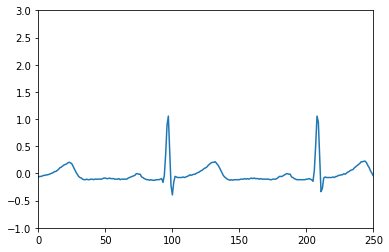

In [12]:
import matplotlib.pyplot as plt

plt.plot(ecgs_train[1]['ecg'][:,0])
plt.xlim(0,250)
plt.ylim(-1,3)

In [13]:
# Utility: given the filename of a signal it returns the sampling frequency
def ecg_freq(filename):
  if '128' in filename:
    return 128
  else:
    return 250

Resampling all the signal to 250 hz

In [14]:
import scipy

In [15]:
resampled_ecg_1_train = []
resampled_ecg_2_train = []
for i in range(len(ecgs_train)):
   secs_1 = len(ecgs_train[i]['ecg'][:,0])/ecg_freq(filenames_train[i]) # Number of seconds in signal X
   secs_2 = len(ecgs_train[i]['ecg'][:,1])/ecg_freq(filenames_train[i]) # Number of seconds in signal X
   samps_1 = secs_1*250     # Number of samples to downsample
   samps_2 = secs_2*250
   resampled_ecg_1_train.append(scipy.signal.resample(ecgs_train[i]['ecg'][:,0] , int(samps_1))) 
   resampled_ecg_2_train.append(scipy.signal.resample(ecgs_train[i]['ecg'][:,1] , int(samps_2))) 

In [16]:
resampled_ecg_1_validation = []
resampled_ecg_2_validation = []
for i in range(len(ecgs_validation)):
   secs_1 = len(ecgs_validation[i]['ecg'][:,0])/ecg_freq(filenames_validation[i]) # Number of seconds in signal X
   secs_2 = len(ecgs_validation[i]['ecg'][:,1])/ecg_freq(filenames_validation[i]) # Number of seconds in signal X
   samps_1 = secs_1*250     # Number of samples to downsample
   samps_2 = secs_2*250
   resampled_ecg_1_validation.append(scipy.signal.resample(ecgs_validation[i]['ecg'][:,0] , int(samps_1))) 
   resampled_ecg_2_validation.append(scipy.signal.resample(ecgs_validation[i]['ecg'][:,1] , int(samps_2))) 

128

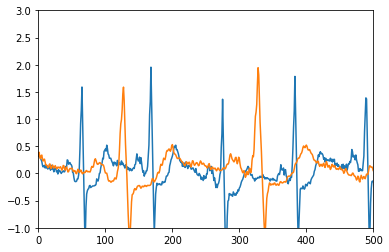

In [17]:
# look effect of signal resampling
beat = 10
plt.plot(ecgs_train[beat]['ecg'][:,0])
plt.plot(resampled_ecg_1_train[beat])
plt.xlim(0, 500)
plt.ylim(-1,3)

ecg_freq(filenames_train[beat])

In [ ]:
#def madev(d, axis=None):
    #""" Mean absolute deviation of a signal """
    #return np.mean(np.absolute(d - np.mean(d, axis)), axis)

In [ ]:
#import pywt

#def wavelet_denoising(x, wavelet='db6', level=2):
    #coeff = pywt.wavedec(x, wavelet, mode="per")
    #sigma = (1/0.6745) * madev(coeff[-level])
    #uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    #coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    #return pywt.waverec(coeff, wavelet, mode='per')

In [ ]:
#from scipy.signal import butter, lfilter, freqz


#def butter_lowpass(cutoff, fs, order=12):
    #nyq = 0.5 * fs
    #normal_cutoff = cutoff / nyq
    #b, a = butter(order, normal_cutoff, btype='low', analog=False)
    #return b, a
    
#def butter_lowpass_filter(data, cutoff, fs, order=5):
    #b, a = butter_lowpass(cutoff, fs, order=order)
    #y = lfilter(b, a, data)
    #return y

In [18]:
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = scipy.signal.firwin(12, 35/125, fs = 250)


In [19]:
mf600 = int(250 * 0.6) - 1
mf200 = int(250 * 0.2) - 1
for i in range(len(resampled_ecg_1_train)):
  resampled_ecg_1_train[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_1_train[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_1_train[i], mf200), mf600))
  resampled_ecg_2_train[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_2_train[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_2_train[i], mf200), mf600))


for i in range(len(resampled_ecg_1_validation)):
  resampled_ecg_1_validation[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_1_validation[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_1_validation[i], mf200), mf600))
  resampled_ecg_2_validation[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_2_validation[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_2_validation[i], mf200), mf600))


(-2.0, 2.0)

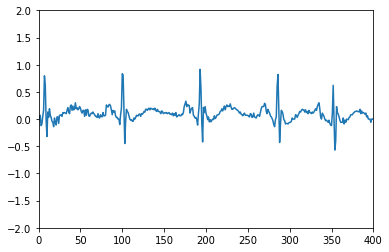

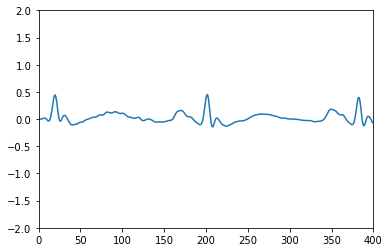

In [20]:
plt.plot(ecgs_train[0]['ecg'][:,0])
plt.xlim(0, 400)
plt.ylim(-2,2)
plt.figure()
plt.plot(resampled_ecg_1_train[0])
plt.xlim(0, 400)
plt.ylim(-2,2)

In [21]:
rpks_train[0]['rpeaks']

array([[     5],
       [    98],
       [   191],
       ...,
       [230129],
       [230229],
       [230329]], dtype=int32)

In [22]:
def from_freq_to_freq(sample, ini_freq, freq = 250):
   secs = sample/ini_freq # Number of seconds in signal X
   samp = secs*freq       # Number of samples to downsample
   return int(samp)

In [23]:
win = 250

In [24]:
heartbeats_train_1 = []
heartbeats_train_2 = []
heartbeats_validation_1 = []
heartbeats_validation_2 = []

for i in range(len(ecgs_train)): 
  for j in range(len(rpks_train[i]['rpeaks'])):
   if(from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i])) < win or from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  + win > from_freq_to_freq(rpks_train[i]['rpeaks'][-1],ecg_freq(filenames_train[i])) or j < 40 or (len(rpks_train[i]['rpeaks']) - (j+1) < 40)): #skipping beats that are too much close to the initial and to the end of the signal 
    anns_train[i]['labels'][j] = 'A'
    rpks_train[i]['rpeaks'][j] = 0
   else: 
    heartbeats_train_1.append(resampled_ecg_1_train[i][from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  - win : from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  + win])
    heartbeats_train_2.append(resampled_ecg_2_train[i][from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  - win : from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  + win])

for i in range(len(ecgs_validation)):
  for j in range(len(rpks_validation[i]['rpeaks'])):
   if(from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i])) < win or from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i])) + win > from_freq_to_freq(rpks_validation[i]['rpeaks'][-1],ecg_freq(filenames_validation[i]))): #skipping beats that are too much close to the initial and to the end of the signal 
    anns_validation[i]['labels'][j] = 'A'
    rpks_validation[i]['rpeaks'][j] = 0
   else: 
    heartbeats_validation_1.append(resampled_ecg_1_validation[i][from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  - win : from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  + win])
    heartbeats_validation_2.append(resampled_ecg_2_validation[i][from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  - win : from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  + win])    

In [25]:
len(rpks_train[0]['rpeaks']), len(np.delete(rpks_train[0]['rpeaks'], 0))

(2313, 2312)

In [26]:
len(heartbeats_train_1), len(heartbeats_train_2), len(heartbeats_validation_1), len(heartbeats_validation_2)

(145732, 145732, 35802, 35802)

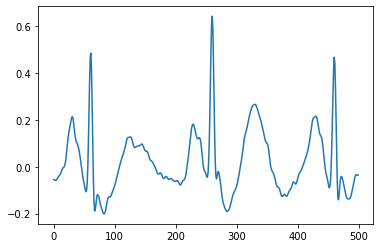

In [27]:
import matplotlib.pyplot as plt
plt.plot(heartbeats_train_1[150])

In [28]:
labels_train = []
labels_validation = []

for i in range(len(ecgs_train)):
  for j in range(len(anns_train[i]['labels'])):
    if(anns_train[i]['labels'][j] != 'A'):
     labels_train.append(anns_train[i]['labels'][j])

for i in range(len(ecgs_validation)):
  for j in range(len(anns_validation[i]['labels'])):
    if(anns_validation[i]['labels'][j] != 'A'):
     labels_validation.append(anns_validation[i]['labels'][j])   

In [29]:
classes_name = ['N', 'S', 'V']

In [30]:
len(labels_train), len(heartbeats_train_1)

(145732, 145732)

In [31]:
len(labels_validation), len(heartbeats_validation_1)

(35802, 35802)

In [32]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels_train)

#One hot encoding of the target values
ohe = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_ohe_train = ohe.fit_transform(integer_encoded)

integer_encoded = label_encoder.fit_transform(labels_validation)

#One hot encoding of the target values
ohe = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_ohe_validation = ohe.fit_transform(integer_encoded)

In [33]:
label_encoder.inverse_transform([0,1,2])

array(['N', 'S', 'V'], dtype='<U1')

In [34]:
ohe.inverse_transform([[1, 0, 0], [0,1,0], [0,0,1]])

array([[0],
       [1],
       [2]])

In [76]:
y_train = target_ohe_train
y_val = target_ohe_validation

In [77]:
X_train_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_train_1, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
X_train_2 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_train_2, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
X_val_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_validation_1, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
X_val_2 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_validation_2, maxlen=win * 2, dtype='float32', truncating='post',padding="post")

In [78]:
y_train.shape

(145732, 3)

In [79]:
X_train_1.shape, X_train_2.shape

((145732, 500), (145732, 500))

In [80]:
X_train = []
for i in range(len(X_train_1)):
  X_train.append([X_train_1[i], X_train_2[i]])

X_train = np.asarray(X_train)

In [81]:
X_val = []
for i in range(len(X_val_1)):
  X_val.append([X_val_1[i], X_val_2[i]])

X_val = np.asarray(X_val)

(145732, 2, 500)

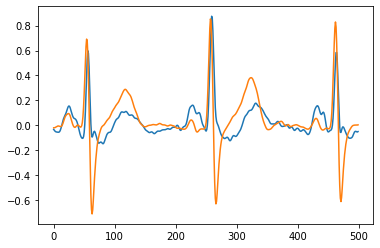

In [82]:
plt.plot(X_train[900][0])
plt.plot(X_train[900][1])
X_train.shape

# 2 leads

Run this cell if you want both leads

In [83]:
# Normalize data
mean = np.mean(X_train, axis=2).mean(axis=0)
std = np.std(X_train, axis=2).mean(axis=0)

X_train[:,0] = (X_train[:,0] - mean[0])/std[0]
X_train[:,1] = (X_train[:,1] - mean[1])/std[1]
X_val[:,0] = (X_val[:,0] - mean[0])/std[0]
X_val[:,1] = (X_val[:,1] - mean[1])/std[1]

mean, std, X_train.shape

(array([ 0.04371833, -0.00052158], dtype=float32),
 array([0.28336304, 0.22441755], dtype=float32),
 (145732, 2, 500))

In [84]:
X_train = np.swapaxes(X_train, 1, 2)
X_val = np.swapaxes(X_val, 1, 2)
X_train.shape, X_val.shape

((145732, 500, 2), (35802, 500, 2))

(145732, 500, 2)

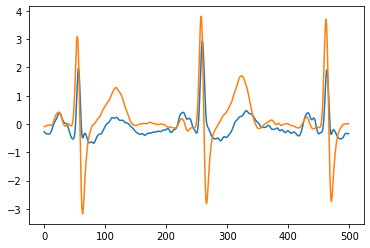

In [85]:
plt.plot(X_train[900][:])
X_train.shape

In [86]:
#Prepare for SMOTE
X_train = X_train.reshape(145732, -1)
X_train.shape

(145732, 1000)

# Only lead 1

Run this cell if you want lead1 only

In [ ]:
X_train = np.asarray(X_train_1)
X_val = np.asarray(X_val_1)

In [ ]:
# Normalize data (used for resnet, not for vgg)
mean = np.mean(X_train, axis=1).mean(axis=0)
std = np.std(X_train, axis=1).mean(axis=0)

X_train = (X_train - mean)/std
X_val = (X_val - mean)/std

mean, std

(0.04371865, 0.28336167)

In [ ]:
len(X_train), len(X_train > 3)

(145732, 145732)

'N'

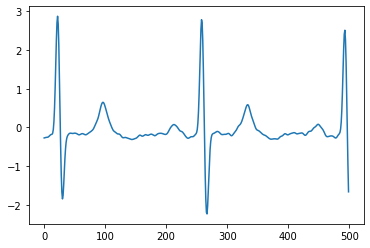

In [ ]:
import matplotlib.pyplot as plt

beat = 40000
plt.plot(X_train[beat])
labels_train[beat]

# Resampling

In [87]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

smote_dict = {1: 40000, 2: 40000}

# Oversampling performed by SMOTE algorithm
#X_train, y_train = SMOTE(random_state=SEED, sampling_strategy= smote_dict ).fit_resample(X_train, y_train)
X_train, y_train = SMOTE(random_state=SEED, sampling_strategy={0: 133730, 1: int(6491 * 5), 2: int(5511 * 6)} ).fit_resample(X_train, y_train) # used on BEST

In [88]:
y_l = y_train.tolist()
len([i for i in y_l if i == [1,0,0]]), len([i for i in y_l if i == [0,1,0]]), len([i for i in y_l if i == [0,0,1]])

(133730, 32455, 33066)

In [89]:
near_miss_dict = {0: 40000}

# Undersampling performed by NearMiss algorithm
#X_train, y_train = NearMiss(sampling_strategy=near_miss_dict).fit_resample(X_train, y_train)
X_train, y_train = RandomUnderSampler(random_state=SEED,sampling_strategy={0: int(133730*0.5), 1: int(6491 * 5), 2: int(5511 * 6)}).fit_resample(X_train, y_train) # used on BEST
#X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [90]:
y_l = y_train.tolist()
len([i for i in y_l if i == [1,0,0]]), len([i for i in y_l if i == [0,1,0]]), len([i for i in y_l if i == [0,0,1]])

(66865, 32455, 33066)

In [104]:
# if 2 leads where used
X_train = X_train.reshape(-1, win, 2)

X_train.shape

(132386, 500, 2)

# Class weights

In [105]:
import sklearn
X_train, y_train = sklearn.utils.shuffle(X_train, y_train)

In [106]:
# Considering class imbalance: class weightning to reduce the bias in the dataset

from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y_train, axis=1)

class_weights = compute_class_weight(
                                      class_weight = "balanced",
                                      classes = np.unique(y_integers),
                                      y = y_integers                                             
                                    )

class_weights = dict(zip(np.unique(y_integers), class_weights))
class_weights

{0: 0.6599665993668835, 1: 1.3596877728136394, 2: 1.334563196838646}

In [107]:
X_train.shape, y_train.shape

((132386, 500, 2), (132386, 3))

In [108]:
#class weights for validation set
y_integers = np.argmax(y_val, axis=1)

class_weights_val = compute_class_weight(
                                      class_weight = "balanced",
                                      classes = np.unique(y_integers),
                                      y = y_integers                                             
                                    )

In [109]:
class_weights_val

array([ 0.36207524,  7.06990521, 10.34142114])

In [110]:
decode = dict(N =  0, S = 1, V  = 2)

In [111]:
samples_class_weights = []
for y in y_val:
  samples_class_weights.append(class_weights_val[ohe.inverse_transform([y])[0][0]])

# Training utilities

In [112]:
# Here we load validation data, training data can be loaded with the batch generator below

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_data = tf.data.Dataset.from_tensor_slices((X_val, y_val, samples_class_weights))

In [113]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix

#utility to plot confusion matrix and evaluation metrics
def evaluate_on_valid(model, batch_size, valid_to_use):
  #Computing the prediction of the model on the validation set
  predictions = []
  for element in valid_to_use.batch(batch_size).as_numpy_iterator():
      predictions.append(model.predict(element[0]))
  
  predictions_f = [item for sublist in predictions for item in sublist]

  predictions_oh = []
  #transform prediction into one-hot-encoding 
  for i in range(len(predictions_f)):
      predictions_oh.append(tf.one_hot(tf.argmax(predictions_f[i]), depth=3))
  
  #Compute the true and prediction array in order to plot the confusion matrix
  y = []

  for y_t in y_val.tolist():
      if(y_t == [1, 0, 0]):
          y.append('N')
      if(y_t == [0, 1 ,0]):
          y.append('S')
      if(y_t == [0, 0 ,1]):
          y.append('V')    

  y_pred = []

  for y_t in predictions_oh:
      if(all(tf.equal(y_t, tf.constant([1, 0, 0], dtype=np.float32)))):
          y_pred.append('N')
      elif(all(tf.equal(y_t, tf.constant([0, 1, 0], dtype=np.float32)))):
          y_pred.append('S')
      elif(all(tf.equal(y_t, tf.constant([0, 0, 1], dtype=np.float32)))):
          y_pred.append('V')  
      else:
          print(y_t)

  # Plot confusion matrix and metrics
  ConfusionMatrixDisplay.from_predictions(y, y_pred, labels = ['N', 'S', 'V'])
  ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true', labels = ['N', 'S', 'V'])

  print(classification_report(y,y_pred))

In [ ]:
import keras.backend as K
import tensorflow as tf

def categorical_focal_loss(gamma=2.0, alpha=0.25):
    """
    Implementation of Focal Loss from the paper in multiclass classification
    Formula:
        loss = -alpha*((1-p)^gamma)*log(p)
    Parameters:
        alpha -- the same as wighting factor in balanced cross entropy
        gamma -- focusing parameter for modulating factor (1-p)
    Default value:
        gamma -- 2.0 as mentioned in the paper
        alpha -- 0.25 as mentioned in the paper
    """
    def focal_loss(y_true, y_pred):
        # Define epsilon so that the backpropagation will not result in NaN
        # for 0 divisor case
        epsilon = K.epsilon()
        # Add the epsilon to prediction value
        #y_pred = y_pred + epsilon
        # Clip the prediction value
        y_pred = K.clip(y_pred, epsilon, 1.0-epsilon)
        # Calculate cross entropy
        cross_entropy = -y_true*K.log(y_pred)
        # Calculate weight that consists of  modulating factor and weighting factor
        weight = alpha * y_true * K.pow((1-y_pred), gamma)
        # Calculate focal loss
        loss = weight * cross_entropy
        # Sum the losses in mini_batch
        loss = K.sum(loss, axis=1)
        return loss
    
    return focal_loss

In [ ]:
def exp_decay(epoch):
   initial_lrate = 1e-2
   k = 0.1
   lrate = initial_lrate * math.exp(-k * epoch)
   return lrate

# LSTM

In [ ]:
input = tf.keras.layers.Input(shape=[win * 2, 1], name='In1')
layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, recurrent_dropout=0,activation="tanh", unroll = False, use_bias = True, recurrent_activation = 'sigmoid'))(input)
layer = tf.keras.layers.Dense(32)(layer)
output = tf.keras.layers.Dense(3, activation='softmax')(layer)

model = tf.keras.Model(inputs = input , outputs = output)

learning_rate = 0.001

model.compile( 
    optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-4), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy', tf.keras.metrics.Precision(class_id=0), tf.keras.metrics.Recall(class_id=0), tf.keras.metrics.Precision(class_id=1), tf.keras.metrics.Recall(class_id=1), tf.keras.metrics.Precision(class_id=2), tf.keras.metrics.Recall(class_id=2)] 
)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 In1 (InputLayer)            [(None, 400, 1)]          0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              33792     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 38,019
Trainable params: 38,019
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data.batch(128), 
    validation_data=validation_data.batch(128),
    shuffle = True,
    epochs = 50,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)],
).history

Epoch 1/50
137/137 [==============================] - 57s 374ms/step - loss: 1.1233 - accuracy: 0.3297 - precision_10: 0.1318 - recall_10: 0.0096 - precision_11: 0.1219 - recall_11: 0.0060 - precision_12: 0.0000e+00 - recall_12: 0.0000e+00 - val_loss: 1.1014 - val_accuracy: 0.2367 - val_precision_10: 0.8991 - val_recall_10: 0.0160 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 2/50
137/137 [==============================] - 49s 359ms/step - loss: 1.1029 - accuracy: 0.3434 - precision_10: 0.3803 - recall_10: 0.0161 - precision_11: 0.2481 - recall_11: 0.0049 - precision_12: 0.0000e+00 - recall_12: 0.0000e+00 - val_loss: 1.1036 - val_accuracy: 0.1419 - val_precision_10: 0.9312 - val_recall_10: 0.0078 - val_precision_11: 0.3077 - val_recall_11: 0.0024 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 3/50
137/137 [==============================] - 49s 359ms/step - loss: 1.0997 - accuracy: 0.3246 - p

# VGG

In [114]:
vgg = tf.keras.Sequential()

vgg.add(tf.keras.layers.Conv1D(input_shape=[win * 2, 2],filters=32,kernel_size=3,padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Flatten())
vgg.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Dropout(0.3, seed=SEED))
vgg.add(tf.keras.layers.Dense(3,activation='softmax'))

vgg.compile( 
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy', tf.keras.metrics.Precision(class_id=0), tf.keras.metrics.Recall(class_id=0), tf.keras.metrics.Precision(class_id=1), tf.keras.metrics.Recall(class_id=1), tf.keras.metrics.Precision(class_id=2), tf.keras.metrics.Recall(class_id=2)] 
)

In [115]:
vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 500, 32)           224       
                                                                 
 conv1d_14 (Conv1D)          (None, 500, 32)           3104      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 250, 64)           6208      
                                                                 
 conv1d_16 (Conv1D)          (None, 250, 64)           12352     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 125, 64)          0         
 1D)                                                  

In [116]:
history = vgg.fit(train_data.batch(32), 
    validation_data=validation_data.batch(32),
    shuffle= True,
    epochs = 50,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True),
).history #50 epoche

Epoch 1/50
4138/4138 [==============================] - 158s 35ms/step - loss: 0.7271 - accuracy: 0.7084 - precision_3: 0.8518 - recall_3: 0.6164 - precision_4: 0.7019 - recall_4: 0.1982 - precision_5: 0.8412 - recall_5: 0.4926 - val_loss: 0.6938 - val_accuracy: 0.8882 - val_precision_3: 0.9858 - val_recall_3: 0.8379 - val_precision_4: 0.2762 - val_recall_4: 0.5586 - val_precision_5: 0.8200 - val_recall_5: 0.6950
Epoch 2/50
4138/4138 [==============================] - 136s 33ms/step - loss: 0.4628 - accuracy: 0.8283 - precision_3: 0.8819 - recall_3: 0.9043 - precision_4: 0.7619 - recall_4: 0.5272 - precision_5: 0.8873 - recall_5: 0.7696 - val_loss: 0.6976 - val_accuracy: 0.8924 - val_precision_3: 0.9892 - val_recall_3: 0.8845 - val_precision_4: 0.5418 - val_recall_4: 0.7097 - val_precision_5: 0.3838 - val_recall_5: 0.7114
Epoch 3/50
4138/4138 [==============================] - 135s 33ms/step - loss: 0.3802 - accuracy: 0.8751 - precision_3: 0.9123 - recall_3: 0.9311 - precision_4: 0.824

              precision    recall  f1-score   support

           N       0.99      0.94      0.97     32960
           S       0.48      0.79      0.60      1688
           V       0.53      0.84      0.65      1154

    accuracy                           0.93     35802
   macro avg       0.67      0.86      0.74     35802
weighted avg       0.95      0.93      0.94     35802



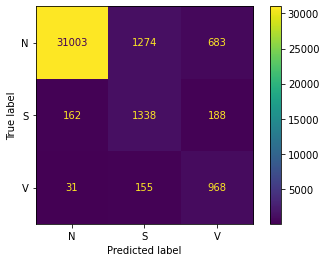

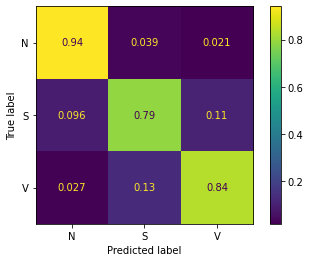

In [117]:
evaluate_on_valid(vgg, 32, validation_data) # try to replicate BEST but with 2 leads

              precision    recall  f1-score   support

           N       0.99      0.92      0.96     32960
           S       0.44      0.73      0.55      1688
           V       0.45      0.92      0.60      1154

    accuracy                           0.91     35802
   macro avg       0.63      0.86      0.70     35802
weighted avg       0.95      0.91      0.93     35802



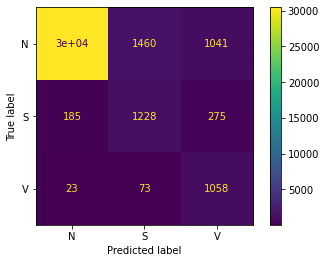

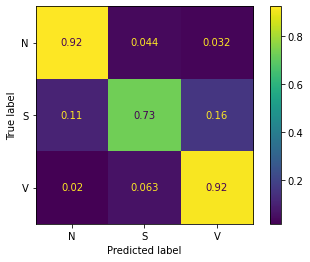

In [ ]:
evaluate_on_valid(vgg, 32, validation_data) # try to replicate BEST

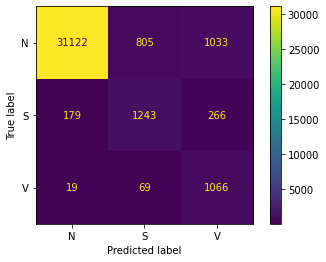

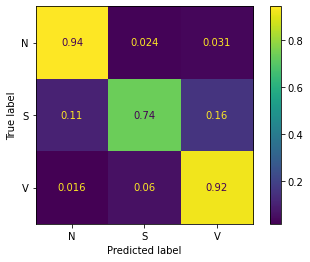

In [ ]:
evaluate_on_valid(vgg, 32, validation_data) # win=250, resampling (smote+randomundersampling non perfettamente bilanciato) BEST RESULT OBTAINED SO FAR, DON'T DELETE THIS CELL

In [134]:
vgg.save('/content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/vgg_resampling_2lead(actual best)')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/vgg_resampling_2lead(actual best)/assets


# ResNet

In [ ]:
# ResNet model definition component by component
import tensorflow.keras.layers as tfkl

def ResBs_Conv(block_input, num_filters): 
   
    # Filter Block input and BatchNormalization
    block_input = tfkl.Conv1D(num_filters, kernel_size=7, strides = 2,  padding = 'same')(block_input) 
    block_input = tfkl.BatchNormalization()(block_input)

    # First Convolutional Layer
    conv1 = tfkl.Conv1D(filters=num_filters, kernel_size=7, padding= 'same')(block_input)
    norm1 = tfkl.BatchNormalization()(conv1)
    relu1 = tfkl.Activation('relu')(norm1)  
    dropout = tfkl.Dropout(0.2)(relu1)
    
    # Second Convolutional Layer 
    conv2 = tfkl.Conv1D(num_filters, kernel_size=7, padding= 'same')(dropout)
    norm2 = tfkl.BatchNormalization()(conv2)

    # Summing Layer (adding a residual connection)
    sum = tfkl.Add()([block_input, norm2])
    
    # Activation Layer
    relu2 = tfkl.Activation('relu')(sum)
    
    return relu2 

def ResBs_Identity(block_input, num_filters): 

    # First Convolutional Layer
    conv1 = tfkl.Conv1D(filters=num_filters, kernel_size=7, padding= 'same')(block_input)
    norm1 = tfkl.BatchNormalization()(conv1)
    relu1 = tfkl.Activation('relu')(norm1)    
    dropout = tfkl.Dropout(0.2)(relu1)
    
    # Second Convolutional Layer 
    conv2 = tfkl.Conv1D(num_filters, kernel_size=7, padding= 'same')(dropout)
    norm2 = tfkl.BatchNormalization()(conv2)

    # Summing Layer (adding a residual connection)
    sum = tfkl.Add()([block_input, norm2])
    
    # Activation Layer
    relu2 = tfkl.Activation('relu')(sum)
    
    return relu2 

def resnet(N=32, ch=1, win_len=100, classes=3): 
    ecg_input = tfkl.Input(shape=(win_len, ch), name='ecg_signal') 

    ResNet = tfkl.Conv1D(filters=64,kernel_size=15, padding = 'same')(ecg_input) 
    ResNet = tfkl.BatchNormalization()(ResNet)
    ResNet = tfkl.Activation('relu')(ResNet)
    ResNet = tfkl.MaxPooling1D(pool_size=2, strides = 2)(ResNet)
    
    # First two ResNet blocks are identity blocks 
    ResNet = ResBs_Identity(ResNet, 64)
    ResNet = ResBs_Identity(ResNet, 64)

    filters = 64
    M= int((N -2 )/2)
    for i in range(M): 
        filters = filters*2
        # define N-th ResBs block
        ResNet = ResBs_Conv(ResNet, filters)
        ResNet = ResBs_Identity(ResNet, filters)
    
    ResNet = tfkl.GlobalMaxPooling1D(name='gmp_layer')(ResNet)
    ResNet = tfkl.Flatten()(ResNet) 

    # Sigmoid activation function on the last layer
    ResNet = tfkl.Dense(classes, activation='softmax')(ResNet)

    # Finally the model is composed by connecting inputs to outputs: 
    model = tf.keras.Model(inputs=[ecg_input],outputs=ResNet)
    return model

In [ ]:
resNet = resnet(N=4, ch=1, win_len=win * 2, classes=3)

resNet.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-4),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

In [ ]:
resNet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ecg_signal (InputLayer)        [(None, 400, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 400, 64)      1024        ['ecg_signal[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 400, 64)     256         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 400, 64)      0           ['batch_normalization[0][0]']

In [ ]:
history = resNet.fit(train_data.batch(128), 
    validation_data=validation_data.batch(128),
    shuffle= True,
    epochs = 30,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
).history

Epoch 1/30
1139/1139 [==============================] - 128s 112ms/step - loss: 0.0426 - accuracy: 0.9855 - precision: 0.9862 - recall: 0.9848 - val_loss: 1.4276 - val_accuracy: 0.9119 - val_precision: 0.9174 - val_recall: 0.9073
Epoch 2/30
1139/1139 [==============================] - 127s 112ms/step - loss: 0.0398 - accuracy: 0.9865 - precision: 0.9872 - recall: 0.9859 - val_loss: 1.6112 - val_accuracy: 0.9148 - val_precision: 0.9209 - val_recall: 0.9118
Epoch 3/30
1139/1139 [==============================] - 127s 112ms/step - loss: 0.0388 - accuracy: 0.9868 - precision: 0.9874 - recall: 0.9861 - val_loss: 1.5604 - val_accuracy: 0.9005 - val_precision: 0.9069 - val_recall: 0.8948
Epoch 4/30
1139/1139 [==============================] - 128s 112ms/step - loss: 0.0380 - accuracy: 0.9868 - precision: 0.9875 - recall: 0.9863 - val_loss: 1.5555 - val_accuracy: 0.8998 - val_precision: 0.9061 - val_recall: 0.8959
Epoch 5/30
1139/1139 [==============================] - 128s 112ms/step - loss: 

In [ ]:
evaluate_on_valid(resNet, 128, validation_data)

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           N       0.99      0.94      0.97     32960
           S       0.59      0.74      0.65      1688
           V       0.45      0.92      0.61      1154

    accuracy                           0.93     35802
   macro avg       0.68      0.87      0.74     35802
weighted avg       0.96      0.93      0.94     35802



In [ ]:
model.save('/content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/best')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/best/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/best/assets


# VGG with Batch Normalization

In [ ]:
vgg = tf.keras.Sequential()

vgg.add(tf.keras.layers.Conv1D(input_shape=[win * 2, 1],filters=32,kernel_size=3,padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.Conv1D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.BatchNormalization())
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.GlobalMaxPooling1D())
vgg.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Dropout(0.3, seed=SEED))
vgg.add(tf.keras.layers.Dense(3,activation='softmax'))

vgg.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-4),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

In [ ]:
vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_37 (Conv1D)          (None, 400, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 400, 32)          128       
 ormalization)                                                   
                                                                 
 conv1d_38 (Conv1D)          (None, 400, 32)           3104      
                                                                 
 batch_normalization_1 (Batc  (None, 400, 32)          128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 200, 32)          0         
 g1D)                                                            
                                                      

In [ ]:
history = vgg.fit(train_data.batch(128), 
    validation_data=validation_data.batch(128),
    shuffle= True,
    epochs = 50,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True),
).history #50 epoche

Epoch 1/50
1120/1120 [==============================] - 139s 114ms/step - loss: 0.1854 - accuracy: 0.9472 - precision_2: 0.9496 - recall_2: 0.9449 - val_loss: 1.9180 - val_accuracy: 0.7946 - val_precision_2: 0.7955 - val_recall_2: 0.7931
Epoch 2/50
1120/1120 [==============================] - 126s 113ms/step - loss: 0.0985 - accuracy: 0.9691 - precision_2: 0.9709 - recall_2: 0.9672 - val_loss: 1.2930 - val_accuracy: 0.7587 - val_precision_2: 0.7639 - val_recall_2: 0.7512
Epoch 3/50
1120/1120 [==============================] - 126s 112ms/step - loss: 0.0701 - accuracy: 0.9780 - precision_2: 0.9795 - recall_2: 0.9767 - val_loss: 1.1791 - val_accuracy: 0.8615 - val_precision_2: 0.8680 - val_recall_2: 0.8553
Epoch 4/50
1120/1120 [==============================] - 126s 112ms/step - loss: 0.0554 - accuracy: 0.9822 - precision_2: 0.9833 - recall_2: 0.9813 - val_loss: 1.1224 - val_accuracy: 0.8694 - val_precision_2: 0.8778 - val_recall_2: 0.8631
Epoch 5/50
1120/1120 [==========================

KeyboardInterrupt: ignored

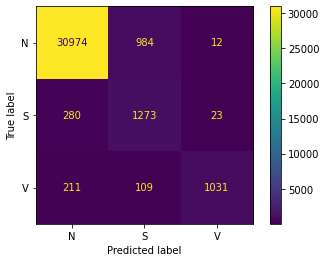

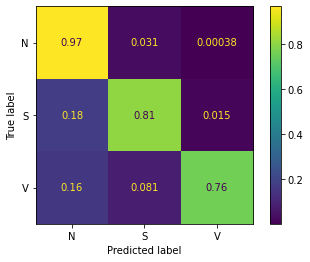

In [ ]:
evaluate_on_valid(vgg, 128, validation_data)

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           N       0.98      0.97      0.98     31970
           S       0.54      0.81      0.65      1576
           V       0.97      0.76      0.85      1351

    accuracy                           0.95     34897
   macro avg       0.83      0.85      0.83     34897
weighted avg       0.96      0.95      0.96     34897



# Features extraction and wide model

In [ ]:
def get_RRs_in_window_centered(rr_intervals, drr_intervals, sample_rpeaks_s, index, window_size_in_minutes = 2):
  #find a windows of dimension 2 minutes around the current R-peak
  cumulative_time = 0
  #window part before the index
  first_index = 0
  last_index = math.inf 
  for i in range(index, 0, -1):
    cumulative_time = cumulative_time + abs(sample_rpeaks_s[i] - sample_rpeaks_s[index])
    if(cumulative_time >= window_size_in_minutes * 60 / 2 and first_index == 0): #stop the extension of the window
      first_index = i

  cumulative_time = 0
  #window part after the index
  for j in range(index, len(sample_rpeaks_s), +1):
     cumulative_time = cumulative_time + abs(sample_rpeaks_s[j] - sample_rpeaks_s[index])
     if(cumulative_time >= window_size_in_minutes * 60 / 2 and last_index == math.inf): #stop the extension of the window
      last_index = j

  if(last_index == math.inf):
    return rr_intervals[first_index:], drr_intervals[first_index:]

  return rr_intervals[first_index:last_index], drr_intervals[first_index:last_index]

def get_RRs_in_window_before(rr_intervals, drr_intervals, sample_rpeaks_s, index, window_size_in_minutes = 2):
  #find a windows of dimension 2 minutes around the current R-peak
  cumulative_time = 0
  #window part before the index
  first_index = 0
  last_index = math.inf 
  for i in range(index, 0, -1):
    cumulative_time = cumulative_time + abs(sample_rpeaks_s[i] - sample_rpeaks_s[index])
    if(cumulative_time >= window_size_in_minutes * 60 and first_index == 0): #stop the extension of the window
      first_index = i

  return rr_intervals[first_index:index], drr_intervals[first_index:index]  

In [ ]:
#Utility function
def pow_list(list_of_items):
  return [item ** 2 for item in list_of_items]

In [ ]:
# list of list that contains all hpv features divided by patient
rr_mean_2_min_centered_train = []
rr_std_2_min_centered_train = []
rr_mean_5_min_centered_train = []
rr_std_5_min_centered_train = []

rr_mean_2_min_before_train = []
rr_std_2_min_before_train = []
rr_mean_5_min_before_train = []
rr_std_5_min_before_train = []

rmssd_2_min_centered_train = []
rmssd_5_min_centered_train = []
rmssd_2_min_before_train = []
rmssd_5_min_before_train = []

drr_mean_2_min_centered_train = []
drr_std_2_min_centered_train = []
drr_mean_5_min_centered_train = []
drr_std_5_min_centered_train = []

drr_mean_2_min_before_train = []
drr_std_2_min_before_train = []
drr_mean_5_min_before_train = []
drr_std_5_min_before_train = []

rr_intervals_train = []
rr_intervals_minus_1_train = []
rr_intervals_plus_1_train = []

#calculating dRR
drr_intervals_train = []
drr_intervals_minus_1_train = []
drr_intervals_plus_1_train = []

for i in tqdm(range(len(ecgs_train))):
  # extract a sample ecg
  sampling = ecg_freq(filenames_train[i])
  #Extract peaks from traning set and their labels
  sample_rpeaks = rpks_train[i]['rpeaks'][rpks_train[i]['rpeaks'] != 0]
  #Calculation of RR intervals
  #conversion in seconds of R peaks
  sample_rpeaks_s = [sample / sampling for sample in sample_rpeaks.flatten()]


  for i in range(len(sample_rpeaks_s) - 1):
    rr_intervals_train.append(sample_rpeaks_s[i+1] - sample_rpeaks_s[i])
  #adding nan value for last peak
  rr_intervals_train.append(math.nan)
  
  rr_intervals_minus_1_train.append(math.nan)
  for i in range(len(sample_rpeaks_s)):
    if i > 0:
      rr_intervals_minus_1_train.append(rr_intervals_train[i -1])
  
  for i in range(len(sample_rpeaks_s) - 1):
    rr_intervals_plus_1_train.append(rr_intervals_train[i + 1])

  rr_intervals_plus_1_train.append(math.nan)


  for i in range(len(drr_intervals_train), len(rr_intervals_train)):
    if(i == (len(rr_intervals_train) -1)): #we need to skip last iteration since we do not have the values
      drr_intervals_train.append(math.nan)
    else:  
      drr_intervals_train.append(rr_intervals_train[i+1] - rr_intervals_train[i])

  drr_intervals_minus_1_train.append(math.nan)
  for i in range(len(drr_intervals_minus_1_train), len(rr_intervals_train)):
    if i > 0:
      drr_intervals_minus_1_train.append(drr_intervals_train[i -1])
  
  for i in range(len(drr_intervals_plus_1_train), len(rr_intervals_train) - 1):
   drr_intervals_plus_1_train.append(drr_intervals_train[i + 1])
      
  drr_intervals_plus_1_train.append(math.nan)

  #Extraction of a window of n minutes (n/2 minutes before and n/2 minutes after) centered on current RR
  #Boundaries of the windows namely first index and last index are
  first_peak_of_window_2_min = -1
  last_peak_of_window_2_min = math.inf

  first_peak_of_window_2_min_before = -1
  first_peak_of_window_5_min_before = -1

  first_peak_of_window_5_min = -1
  last_peak_of_window_5_min = math.inf

  for i in range(len(sample_rpeaks_s)):
   if(sample_rpeaks_s[i] >= 1.0*60 and first_peak_of_window_2_min == -1):
     first_peak_of_window_2_min = i
   if(sample_rpeaks_s[i] >= 2.0 * 60 and first_peak_of_window_2_min_before == -1):
     first_peak_of_window_2_min_before = i
   if(sample_rpeaks_s[i] >= 5.0 * 60 and first_peak_of_window_5_min_before == -1):
     first_peak_of_window_5_min_before = i


  for i in range(len(sample_rpeaks_s)):
   if(sample_rpeaks_s[i] >= 2.5*60 and first_peak_of_window_5_min == -1):
     first_peak_of_window_5_min = i

 #starting from the last index in order to get the last index that satisfy the condition
  for i in range(len(sample_rpeaks_s) - 1, 0, -1):
    if(sample_rpeaks_s[i] < 29.0 * 60  and last_peak_of_window_2_min == math.inf):
      last_peak_of_window_2_min = i 

  for i in range(len(sample_rpeaks_s) - 1, 0, -1):
    if(sample_rpeaks_s[i] < 27.5 * 60  and last_peak_of_window_5_min == math.inf):
      last_peak_of_window_5_min = i 
 

 #fill the first and the last position of the values related to windows measures with nan


  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_2_min or i >= last_peak_of_window_2_min):
      rr_mean_2_min_centered_train.append(math.nan)
      rr_std_2_min_centered_train.append(math.nan)
      drr_mean_2_min_centered_train.append(math.nan)
      drr_std_2_min_centered_train.append(math.nan)
      rmssd_2_min_centered_train.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_centered(rr_intervals_train, drr_intervals_train, sample_rpeaks_s, i)
      rr_mean_2_min_centered_train.append(np.nanmean(rr_in_window))
      rr_std_2_min_centered_train.append(np.nanstd(rr_in_window))
      drr_mean_2_min_centered_train.append(np.nanmean(drr_in_window))
      drr_std_2_min_centered_train.append(np.nanstd(drr_in_window))
      rmssd_2_min_centered_train.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))


  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_5_min or i >= last_peak_of_window_5_min):
      rr_mean_5_min_centered_train.append(math.nan)
      rr_std_5_min_centered_train.append(math.nan)
      drr_mean_5_min_centered_train.append(math.nan)
      drr_std_5_min_centered_train.append(math.nan)
      rmssd_5_min_centered_train.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_centered(rr_intervals_train, drr_intervals_train, sample_rpeaks_s, i, window_size_in_minutes=5)
      rr_mean_5_min_centered_train.append(np.nanmean(rr_in_window))
      rr_std_5_min_centered_train.append(np.nanstd(rr_in_window))
      drr_mean_5_min_centered_train.append(np.nanmean(drr_in_window))
      drr_std_5_min_centered_train.append(np.nanstd(drr_in_window))
      rmssd_5_min_centered_train.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))
 
  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_2_min_before):
      rr_mean_2_min_before_train.append(math.nan)
      rr_std_2_min_before_train.append(math.nan)
      drr_mean_2_min_before_train.append(math.nan)
      drr_std_2_min_before_train.append(math.nan)
      rmssd_2_min_before_train.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_before(rr_intervals_train, drr_intervals_train, sample_rpeaks_s, i, window_size_in_minutes=2)
      rr_mean_2_min_before_train.append(np.nanmean(rr_in_window))
      rr_std_2_min_before_train.append(np.nanstd(rr_in_window))
      drr_mean_2_min_before_train.append(np.nanmean(drr_in_window))
      drr_std_2_min_before_train.append(np.nanstd(drr_in_window))  
      rmssd_2_min_before_train.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))

  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_5_min_before):
      rr_mean_5_min_before_train.append(math.nan)
      rr_std_5_min_before_train.append(math.nan)
      drr_mean_5_min_before_train.append(math.nan)
      drr_std_5_min_before_train.append(math.nan)
      rmssd_5_min_before_train.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_before(rr_intervals_train, drr_intervals_train, sample_rpeaks_s, i, window_size_in_minutes=5)
      rr_mean_5_min_before_train.append(np.nanmean(rr_in_window))
      rr_std_5_min_before_train.append(np.nanstd(rr_in_window))
      drr_mean_5_min_before_train.append(np.nanmean(drr_in_window))
      drr_std_5_min_before_train.append(np.nanstd(drr_in_window)) 
      rmssd_5_min_before_train.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window))) 

100%|██████████| 64/64 [14:44<00:00, 13.82s/it]


In [ ]:
hpv_features_train = dict(rr_intervals = rr_intervals_train, rr_intervals_plus_1 = rr_intervals_plus_1_train , rr_intervals_minus_1 = rr_intervals_minus_1_train,  rr_mean_2_min_window_centered = rr_mean_2_min_centered_train, drr_intervals = drr_intervals_train, drr_intervals_plus_1 = drr_intervals_plus_1_train, drr_intervals_minus_1 = drr_intervals_minus_1_train,
                    rr_std_2_min_window_centered = rr_std_2_min_centered_train, drr_mean_2_min_window_centered = drr_mean_2_min_centered_train, drr_std_2_min_window_centered = drr_std_2_min_centered_train, rmssd_2_min_window_centered = rmssd_2_min_centered_train,
                    rr_std_5_min_window_centered = rr_std_5_min_centered_train, drr_mean_5_min_window_centered = drr_mean_5_min_centered_train, drr_std_5_min_window_centered = drr_std_5_min_centered_train, rmssd_5_min_window_centered = rmssd_5_min_centered_train,
                    rr_mean_2_min_before = rr_mean_2_min_before_train, rr_std_2_min_window_before = rr_std_2_min_before_train, drr_mean_2_min_window_before = drr_mean_2_min_before_train, drr_std_2_min_window_before = drr_std_2_min_before_train, rmssd_2_min_window_before = rmssd_2_min_before_train,
                    rr_mean_5_min_window_before = rr_mean_5_min_before_train, rr_std_5_min_window_before = rr_std_5_min_before_train, drr_mean_5_min_window_before = drr_mean_5_min_before_train, drr_std_5_min_before = drr_std_5_min_before_train, rmssd_5_min_window_before = rmssd_5_min_before_train)

hpv_features_train = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in hpv_features_train.items() ])) 

In [ ]:
len(hpv_features_train), len(X_train)

(145732, 145732)

In [ ]:
# list of list that contains all hpv features divided by patient
rr_mean_2_min_centered_validation = []
rr_std_2_min_centered_validation = []
rr_mean_5_min_centered_validation = []
rr_std_5_min_centered_validation = []

rr_mean_2_min_before_validation = []
rr_std_2_min_before_validation = []
rr_mean_5_min_before_validation = []
rr_std_5_min_before_validation = []

rmssd_2_min_centered_validation = []
rmssd_5_min_centered_validation = []
rmssd_2_min_before_validation = []
rmssd_5_min_before_validation = []

drr_mean_2_min_centered_validation = []
drr_std_2_min_centered_validation = []
drr_mean_5_min_centered_validation = []
drr_std_5_min_centered_validation = []

drr_mean_2_min_before_validation = []
drr_std_2_min_before_validation = []
drr_mean_5_min_before_validation = []
drr_std_5_min_before_validation = []

rr_intervals_validation = []
rr_intervals_minus_1_validation = []
rr_intervals_plus_1_validation = []

drr_intervals_validation = []
drr_intervals_minus_1_validation = []
drr_intervals_plus_1_validation = []


for i in tqdm(range(len(ecgs_validation))):
  # extract a sample ecg
  sampling = ecg_freq(filenames_validation[i])
  #Extract peaks from traning set and their labels
  sample_rpeaks = rpks_validation[i]['rpeaks'][rpks_validation[i]['rpeaks'] != 0]
  #Calculation of RR intervals
  #conversion in seconds of R peaks
  sample_rpeaks_s = [sample / sampling for sample in sample_rpeaks.flatten()]

  for i in range(len(sample_rpeaks_s) - 1):
    rr_intervals_validation.append(sample_rpeaks_s[i+1] - sample_rpeaks_s[i])
  #adding nan value for last peak
  rr_intervals_validation.append(math.nan)
  
  rr_intervals_minus_1_validation.append(math.nan)
  for i in range(len(sample_rpeaks_s)):
    if i > 0:
      rr_intervals_minus_1_validation.append(rr_intervals_validation[i -1])
  
  for i in range(len(sample_rpeaks_s) - 1):
    rr_intervals_plus_1_validation.append(rr_intervals_validation[i + 1])

  rr_intervals_plus_1_validation.append(math.nan)
  #calculating dRR


  for i in range(len(drr_intervals_validation),len(rr_intervals_validation)):
    if(i == len(rr_intervals_validation) -1): #we need to skip last iteration since we do not have the values
      drr_intervals_validation.append(math.nan)
    else:  
      drr_intervals_validation.append(rr_intervals_validation[i+1] - rr_intervals_validation[i])

  drr_intervals_minus_1_validation.append(math.nan)
  for i in range(len(drr_intervals_minus_1_validation),len(rr_intervals_validation)):
    if i > 0:
      drr_intervals_minus_1_validation.append(drr_intervals_validation[i -1])
  
  for i in range(len(drr_intervals_plus_1_validation), len(rr_intervals_validation) - 1):
   drr_intervals_plus_1_validation.append(drr_intervals_validation[i + 1])
      
  drr_intervals_plus_1_validation.append(math.nan)

  #Extraction of a window of n minutes (n/2 minutes before and n/2 minutes after) centered on current RR
  #Boundaries of the windows namely first index and last index are
  first_peak_of_window_2_min = -1
  last_peak_of_window_2_min = math.inf

  first_peak_of_window_2_min_before = -1
  first_peak_of_window_5_min_before = -1

  first_peak_of_window_5_min = -1
  last_peak_of_window_5_min = math.inf

  for i in range(len(sample_rpeaks_s)):
   if(sample_rpeaks_s[i] >= 1.0*60 and first_peak_of_window_2_min == -1):
     first_peak_of_window_2_min = i
   if(sample_rpeaks_s[i] >= 2.0 * 60 and first_peak_of_window_2_min_before == -1):
     first_peak_of_window_2_min_before = i
   if(sample_rpeaks_s[i] >= 5.0 * 60 and first_peak_of_window_5_min_before == -1):
     first_peak_of_window_5_min_before = i


  for i in range(len(sample_rpeaks_s)):
   if(sample_rpeaks_s[i] >= 2.5*60 and first_peak_of_window_5_min == -1):
     first_peak_of_window_5_min = i

 #starting from the last index in order to get the last index that satisfy the condition
  for i in range(len(sample_rpeaks_s) - 1, 0, -1):
    if(sample_rpeaks_s[i] < 29.0 * 60  and last_peak_of_window_2_min == math.inf):
      last_peak_of_window_2_min = i 

  for i in range(len(sample_rpeaks_s) - 1, 0, -1):
    if(sample_rpeaks_s[i] < 27.5 * 60  and last_peak_of_window_5_min == math.inf):
      last_peak_of_window_5_min = i 
 

 #fill the first and the last position of the values related to windows measures with nan


  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_2_min or i >= last_peak_of_window_2_min):
      rr_mean_2_min_centered_validation.append(math.nan)
      rr_std_2_min_centered_validation.append(math.nan)
      drr_mean_2_min_centered_validation.append(math.nan)
      drr_std_2_min_centered_validation.append(math.nan)
      rmssd_2_min_centered_validation.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_centered(rr_intervals_validation, drr_intervals_validation, sample_rpeaks_s, i)
      rr_mean_2_min_centered_validation.append(np.nanmean(rr_in_window))
      rr_std_2_min_centered_validation.append(np.nanstd(rr_in_window))
      drr_mean_2_min_centered_validation.append(np.nanmean(drr_in_window))
      drr_std_2_min_centered_validation.append(np.nanstd(drr_in_window))
      rmssd_2_min_centered_validation.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))


  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_5_min or i >= last_peak_of_window_5_min):
      rr_mean_5_min_centered_validation.append(math.nan)
      rr_std_5_min_centered_validation.append(math.nan)
      drr_mean_5_min_centered_validation.append(math.nan)
      drr_std_5_min_centered_validation.append(math.nan)
      rmssd_5_min_centered_validation.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_centered(rr_intervals_validation, drr_intervals_validation, sample_rpeaks_s, i, window_size_in_minutes=5)
      rr_mean_5_min_centered_validation.append(np.nanmean(rr_in_window))
      rr_std_5_min_centered_validation.append(np.nanstd(rr_in_window))
      drr_mean_5_min_centered_validation.append(np.nanmean(drr_in_window))
      drr_std_5_min_centered_validation.append(np.nanstd(drr_in_window))
      rmssd_5_min_centered_validation.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))
 
  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_2_min_before):
      rr_mean_2_min_before_validation.append(math.nan)
      rr_std_2_min_before_validation.append(math.nan)
      drr_mean_2_min_before_validation.append(math.nan)
      drr_std_2_min_before_validation.append(math.nan)
      rmssd_2_min_before_validation.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_before(rr_intervals_validation, drr_intervals_validation, sample_rpeaks_s, i, window_size_in_minutes=2)
      rr_mean_2_min_before_validation.append(np.nanmean(rr_in_window))
      rr_std_2_min_before_validation.append(np.nanstd(rr_in_window))
      drr_mean_2_min_before_validation.append(np.nanmean(drr_in_window))
      drr_std_2_min_before_validation.append(np.nanstd(drr_in_window))  
      rmssd_2_min_before_validation.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))

  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_5_min_before):
      rr_mean_5_min_before_validation.append(math.nan)
      rr_std_5_min_before_validation.append(math.nan)
      drr_mean_5_min_before_validation.append(math.nan)
      drr_std_5_min_before_validation.append(math.nan)
      rmssd_5_min_before_validation.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_before(rr_intervals_validation, drr_intervals_validation, sample_rpeaks_s, i, window_size_in_minutes=5)
      rr_mean_5_min_before_validation.append(np.nanmean(rr_in_window))
      rr_std_5_min_before_validation.append(np.nanstd(rr_in_window))
      drr_mean_5_min_before_validation.append(np.nanmean(drr_in_window))
      drr_std_5_min_before_validation.append(np.nanstd(drr_in_window)) 
      rmssd_5_min_before_validation.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window))) 

100%|██████████| 16/16 [03:25<00:00, 12.83s/it]


In [ ]:
hpv_features_validation = dict(rr_intervals = rr_intervals_validation, rr_intervals_plus_1 = rr_intervals_plus_1_validation , rr_intervals_minus_1 = rr_intervals_minus_1_validation, rr_mean_2_min_window_centered = rr_mean_2_min_centered_validation, drr_intervals = drr_intervals_validation, drr_intervals_plus_1 = drr_intervals_plus_1_validation, drr_intervals_minus_1 = drr_intervals_minus_1_validation,
                    rr_std_2_min_window_centered = rr_std_2_min_centered_validation, drr_mean_2_min_window_centered = drr_mean_2_min_centered_validation, drr_std_2_min_window_centered = drr_std_2_min_centered_validation, rmssd_2_min_window_centered = rmssd_2_min_centered_validation,
                    rr_std_5_min_window_centered = rr_std_5_min_centered_validation, drr_mean_5_min_window_centered = drr_mean_5_min_centered_validation, drr_std_5_min_window_centered = drr_std_5_min_centered_validation, rmssd_5_min_window_centered = rmssd_5_min_centered_validation,
                    rr_mean_2_min_before = rr_mean_2_min_before_validation, rr_std_2_min_window_before = rr_std_2_min_before_validation, drr_mean_2_min_window_before = drr_mean_2_min_before_validation, drr_std_2_min_window_before = drr_std_2_min_before_validation, rmssd_2_min_window_before = rmssd_2_min_before_validation,
                    rr_mean_5_min_window_before = rr_mean_5_min_before_validation, rr_std_5_min_window_before = rr_std_5_min_before_validation, drr_mean_5_min_window_before = drr_mean_5_min_before_validation, drr_std_5_min_before = drr_std_5_min_before_validation, rmssd_5_min_window_before = rmssd_5_min_before_validation) 

hpv_features_validation = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in hpv_features_validation.items() ])) 

In [ ]:
hpv_features_validation

,rr_intervals,rr_intervals_plus_1,rr_intervals_minus_1,rr_mean_2_min_window_centered,drr_intervals,drr_intervals_plus_1,drr_intervals_minus_1,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before
0,0.898438,1.367188,NaN,NaN,0.468750,-0.570312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.367188,0.796875,0.898438,NaN,-0.570312,0.156250,0.468750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.796875,0.953125,1.367188,NaN,0.156250,-0.500000,-0.570312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.953125,0.453125,0.796875,NaN,-0.500000,0.500000,0.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.453125,0.953125,0.953125,NaN,0.500000,-0.476562,-0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34566,0.781250,0.687500,0.687500,NaN,-0.039062,-0.343750,-0.367188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.687066,0.058433,-0.000868,0.100990,0.689546,0.689174,0.063102,-0.002790,0.106716,0.692057
34567,0.742188,0.585938,0.687500,NaN,-0.343750,0.671875,-0.039062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.686198,0.058304,0.004774,0.097999,0.688670,0.686384,0.061364,-0.000279,0.105922,0.689121
34568,0.398438,0.765625,0.687500,NaN,0.671875,NaN,-0.343750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.690972,0.054577,-0.009115,0.094300,0.693124,0.686105,0.061340,-0.000279,0.105922,0.688841
34569,1.070312,0.695312,0.585938,NaN,NaN,NaN,0.671875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681858,0.057575,0.003906,0.102898,0.684284,0.685826,0.061776,0.000279,0.106824,0.688603


In [ ]:
len(rr_intervals_validation)

34897

In [ ]:
len(heartbeats_validation_1), len(hpv_features_validation)

(34897, 34897)

In [ ]:
len(heartbeats_train_1) ,len(hpv_features_train)

(143335, 143335)

In [ ]:
#X_train, y_train, train = sklearn.utils.shuffle(X_train, y_train, hpv_features_train, random_state=SEED)

In [ ]:
train_target = y_train
train_features = hpv_features_train

In [ ]:
test_target = y_val
test_features = hpv_features_validation

In [ ]:
for key in train_features.keys():
  train_features[key] = train_features[key].fillna(0)

for key in test_features.keys():
  test_features[key] = test_features[key].fillna(0)  

In [ ]:
# 2. Standarize data with StandardScaler transformation
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(train_features)
features_list = train_features.columns.tolist()
train_features_zscore = transformer.transform(train_features)
#Transform the numpy array back to a dataframe
train_features = pd.DataFrame(data=train_features_zscore, columns=features_list)

In [ ]:
features_list = test_features.columns.tolist()
test_features_zscore = transformer.transform(test_features)
#Transform the numpy array back to a dataframe
test_features = pd.DataFrame(data=test_features_zscore, columns=features_list)

In [ ]:
len(heartbeats_validation_1), len(test_features)

(34571, 34571)

In [ ]:
len(X_val), len(test_features)

(34571, 34571)

In [ ]:
test_features

,rr_intervals,rr_intervals_plus_1,rr_intervals_minus_1,rr_mean_2_min_window_centered,drr_intervals,drr_intervals_plus_1,drr_intervals_minus_1,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before
0,0.505690,7.269374,-9.870581,-5.102727,1.506482,-1.832966,0.000016,-1.486625,0.020631,-1.305935,-4.741074,-1.484239,0.026759,-1.348752,-2.409493,-4.168584,-1.250628,0.015974,-1.109987,-4.003702,-2.314351,-1.281380,0.027415,-1.167363,-2.257590
1,2.242125,0.120712,1.393753,-5.102727,-1.832852,0.502168,1.506482,-1.486625,0.020631,-1.305935,-4.741074,-1.484239,0.026759,-1.348752,-2.409493,-4.168584,-1.250628,0.015974,-1.109987,-4.003702,-2.314351,-1.281380,0.027415,-1.167363,-2.257590
2,0.129462,2.079249,7.270796,-5.102727,0.502171,-1.606986,-1.832852,-1.486625,0.020631,-1.305935,-4.741074,-1.484239,0.026759,-1.348752,-2.409493,-4.168584,-1.250628,0.015974,-1.109987,-4.003702,-2.314351,-1.281380,0.027415,-1.167363,-2.257590
3,0.708274,-4.188071,0.120393,-5.102727,-1.606882,1.606963,0.502171,-1.486625,0.020631,-1.305935,-4.741074,-1.484239,0.026759,-1.348752,-2.409493,-4.168584,-1.250628,0.015974,-1.109987,-4.003702,-2.314351,-1.281380,0.027415,-1.167363,-2.257590
4,-1.143924,2.079249,2.079408,-5.102727,1.606914,-1.531659,-1.606882,-1.486625,0.020631,-1.305935,-4.741074,-1.484239,0.026759,-1.348752,-2.409493,-4.168584,-1.250628,0.015974,-1.109987,-4.003702,-2.314351,-1.281380,0.027415,-1.167363,-2.257590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34566,0.071581,-1.250264,-1.250917,-5.102727,-0.125523,-1.104806,-1.180050,-1.486625,0.020631,-1.305935,-4.741074,-1.484239,0.026759,-1.348752,-2.409493,-0.335849,0.238312,-0.150115,0.320821,-0.303591,0.083451,0.408726,-0.830645,0.465195,0.102862
34567,-0.073122,-2.523314,-1.250917,-5.102727,-1.104727,2.159361,-0.125523,-1.486625,0.020631,-1.305935,-4.741074,-1.484239,0.026759,-1.348752,-2.409493,-0.340692,0.235023,0.929467,0.278451,-0.308291,0.073744,0.362154,-0.058391,0.453046,0.092849
34568,-1.346509,-0.270996,-1.250917,-5.102727,2.159285,-0.000011,-1.104727,-1.486625,0.020631,-1.305935,-4.741074,-1.484239,0.026759,-1.348752,-2.409493,-0.314059,0.140066,-1.727967,0.226043,-0.284391,0.072773,0.361525,-0.058391,0.453046,0.091894
34569,1.142383,-1.152337,-2.524276,-5.102727,0.000016,-0.000011,2.159285,-1.486625,0.020631,-1.305935,-4.741074,-1.484239,0.026759,-1.348752,-2.409493,-0.364904,0.216465,0.763378,0.347852,-0.331828,0.071802,0.373194,0.113221,0.466840,0.091079


In [ ]:
train_data_wide = tf.data.Dataset.from_tensor_slices(({"In1": X_train, "In2": train_features}, y_train))

In [ ]:
validation_data_wide = tf.data.Dataset.from_tensor_slices(({"In1":X_val, "In2": test_features,}, y_val, samples_class_weights))

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
# Implementation of a wide vgg which exploit also features in the input
ecg_input = tf.keras.layers.Input(shape=[win * 2, 1], name='In1')
wide_input = tf.keras.layers.Input(shape= (len(train_features.columns.tolist()), ), name = 'In2')
wide_branch = tf.keras.layers.Dense(24, activation='LeakyReLU')(wide_input) #best 12
wide_branch = tf.keras.layers.Dropout(0.3, seed=SEED)(wide_branch)

layer = tf.keras.layers.Conv1D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(ecg_input)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.GlobalMaxPooling1D()(layer)
layer = tf.keras.layers.Dense(128, activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Dropout(0.3, seed=SEED)(layer)

layer  = tf.keras.layers.concatenate([layer, wide_branch])

out = tf.keras.layers.Dense(3, activation='softmax')(layer)

# Finally the model is composed by connecting inputs to outputs: 
model = tf.keras.Model(inputs=[ecg_input, wide_input],outputs=out)

In [ ]:
from keras import backend as K
def recall_N(y_true, y_pred):
    y_true_c = y_true[y_true == [1, 0, 0]]
    y_pred_c = y_pred[y_true == [1, 0, 0]]
    y_true = y_true_c
    y_pred = y_pred_c
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_N(y_true, y_pred):
    y_true_c = y_true[y_true == [1, 0, 0]]
    y_pred_c = y_pred[y_true == [1, 0, 0]]
    y_true = y_true_c
    y_pred = y_pred_c
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall_S(y_true, y_pred):
    y_true_c = y_true[y_true == [0, 1, 0]]
    y_pred_c = y_pred[y_true == [0, 1, 0]]
    y_true = y_true_c
    y_pred = y_pred_c
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_S(y_true, y_pred):
    y_true_c = y_true[y_true == [0, 1, 0]]
    y_pred_c = y_pred[y_true == [0, 1, 0]]
    y_true = y_true_c
    y_pred = y_pred_c
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall_V(y_true, y_pred):
    y_true_c = y_true[y_true == [0, 0, 1]]
    y_pred_c = y_pred[y_true == [0, 0, 1]]
    y_true = y_true_c
    y_pred = y_pred_c
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_V(y_true, y_pred):
    y_true_c = y_true[y_true == [0, 0, 1]]
    y_pred_c = y_pred[y_true == [0, 0, 1]]
    y_true = y_true_c
    y_pred = y_pred_c
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision        

def f1_S(y_true, y_pred):
    precision = precision_S(y_true, y_pred)
    recall = recall_S(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
2*((0.7392 *0.3709 )/(0.7392 +0.3709 +K.epsilon()))

0.493954157827749

In [ ]:
model.compile( 
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy', precision_N, recall_N, precision_S, recall_S, f1_S, precision_V, recall_V] 
)

In [ ]:
history = model.fit(train_data_wide.batch(128), 
    validation_data=validation_data_wide.batch(128),
    shuffle= True,
    epochs = 60,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True),
).history

Epoch 1/60
1139/1139 [==============================] - 79s 66ms/step - loss: 0.4143 - accuracy: 0.9094 - precision_N: 0.9938 - recall_N: 0.9627 - precision_S: 0.0015 - recall_S: 0.0011 - f1_S: 0.0011 - precision_V: 7.1923e-04 - recall_V: 7.7183e-04 - val_loss: 4.8280 - val_accuracy: 0.9206 - val_precision_N: 1.0000 - val_recall_N: 1.0000 - val_precision_S: 0.0000e+00 - val_recall_S: 0.0000e+00 - val_f1_S: 0.0000e+00 - val_precision_V: 0.0000e+00 - val_recall_V: 0.0000e+00
Epoch 2/60
1139/1139 [==============================] - 74s 65ms/step - loss: 0.3193 - accuracy: 0.9184 - precision_N: 0.9985 - recall_N: 0.9942 - precision_S: 0.0164 - recall_S: 0.0158 - f1_S: 0.0161 - precision_V: 0.0020 - recall_V: 0.0012 - val_loss: 3.9690 - val_accuracy: 0.9206 - val_precision_N: 1.0000 - val_recall_N: 1.0000 - val_precision_S: 0.0000e+00 - val_recall_S: 0.0000e+00 - val_f1_S: 0.0000e+00 - val_precision_V: 0.0000e+00 - val_recall_V: 0.0000e+00
Epoch 3/60
1139/1139 [==============================

In [ ]:
evaluate_on_valid(model, 128, validation_data_wide)

In [ ]:
# Implementation of a wide version of a simple LSTM model
input = tf.keras.layers.Input(shape=[win * 2, 1], name='In1')
wide_input = tf.keras.layers.Input(shape= (len(train_features.columns.tolist()),), name = 'In2')
wide_branch = tf.keras.layers.Dense(12, activation='LeakyReLU')(wide_input)

layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, recurrent_dropout=0,activation="tanh", unroll = False, use_bias = True, recurrent_activation = 'sigmoid'))(input)
layer = tf.keras.layers.Dense(32)(layer)
layer = tf.keras.layers.Dropout(0.3, seed=SEED)(layer)
layer  = tf.keras.layers.concatenate([layer, wide_branch])

output = tf.keras.layers.Dense(3, activation='softmax')(layer)

model = tf.keras.Model(inputs=[input, wide_input],outputs=output)

learning_rate = 0.001
model.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)


In [ ]:
history = model.fit(train_data_wide.batch(128), 
    validation_data=validation_data_wide.batch(128),
    shuffle= True,
    epochs = 60,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True),
).history

Epoch 1/60
1160/1160 [==============================] - 49s 39ms/step - loss: 0.2415 - accuracy: 0.9325 - precision_15: 0.9415 - recall_15: 0.9251 - val_loss: 1.9633 - val_accuracy: 0.9248 - val_precision_15: 0.9287 - val_recall_15: 0.9231
Epoch 2/60
1160/1160 [==============================] - 45s 39ms/step - loss: 0.2389 - accuracy: 0.9308 - precision_15: 0.9389 - recall_15: 0.9239 - val_loss: 1.9889 - val_accuracy: 0.8676 - val_precision_15: 0.8809 - val_recall_15: 0.8497
Epoch 3/60
1160/1160 [==============================] - 45s 38ms/step - loss: 0.2147 - accuracy: 0.9400 - precision_15: 0.9476 - recall_15: 0.9342 - val_loss: 3.4654 - val_accuracy: 0.9209 - val_precision_15: 0.9217 - val_recall_15: 0.9204
Epoch 4/60
1160/1160 [==============================] - 46s 39ms/step - loss: 0.2306 - accuracy: 0.9358 - precision_15: 0.9410 - recall_15: 0.9299 - val_loss: 2.3014 - val_accuracy: 0.9264 - val_precision_15: 0.9275 - val_recall_15: 0.9245
Epoch 5/60
1160/1160 [==================

KeyboardInterrupt: ignored

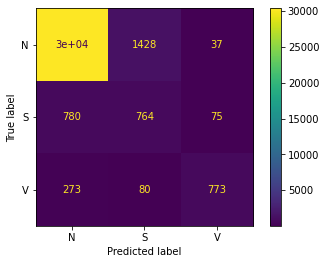

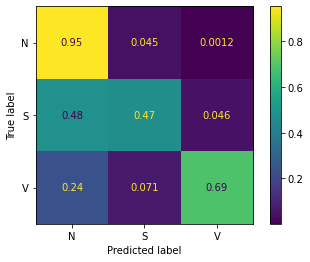

In [ ]:
evaluate_on_valid(model, 128, validation_data_wide)

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           N       0.97      0.95      0.96     31826
           S       0.34      0.47      0.39      1619
           V       0.87      0.69      0.77      1126

    accuracy                           0.92     34571
   macro avg       0.73      0.70      0.71     34571
weighted avg       0.93      0.92      0.93     34571



# DenseNet and other trials

In [ ]:
semi_window=125

In [ ]:
!git clone https://github.com/ankitvgupta/densenet_1d.git

!python /content/densenet_1d/setup.py install

%cd densenet_1d/

Cloning into 'densenet_1d'...
remote: Enumerating objects: 64, done.
remote: Total 64 (delta 0), reused 0 (delta 0), pack-reused 64
Unpacking objects: 100% (64/64), done.
running install
running bdist_egg
running egg_info
creating densenet.egg-info
writing densenet.egg-info/PKG-INFO
writing dependency_links to densenet.egg-info/dependency_links.txt
writing top-level names to densenet.egg-info/top_level.txt
writing manifest file 'densenet.egg-info/SOURCES.txt'
reading manifest file 'densenet.egg-info/SOURCES.txt'
writing manifest file 'densenet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying densenet.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying densenet.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying densenet.egg-info/dependency_links.txt -> build/bdist.

In [ ]:
from densenet.classifiers.one_d import DenseNet121

supernet = DenseNet121(input_shape=(semi_window*2, 1))
print(supernet.summary())

Model: "dense_net121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 1)]     0           []                               
                                                                                                  
 conv1d_215 (Conv1D)            (None, 125, 64)      512         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 125, 64)     256         ['conv1d_215[0][0]']             
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 125, 64)      0           ['batch_normalization[

In [ ]:
import tensorflow.keras.layers as tfkl
import tensorflow.keras as tfk

inputs = tfk.Input(shape=(semi_window*2, 1))
x = supernet(inputs)
x = tfkl.Dense(
    128, 
    activation='relu',
    kernel_initializer = tfk.initializers.GlorotUniform(SEED))(x)
x = tfkl.Dropout(0.4, seed=SEED)(x)
outputs = tfkl.Dense(
    3, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(SEED))(x)

# Connect input and output through the Model class
densenet = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model
densenet.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Nadam(1e-4), metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

history = densenet.fit(train_data.batch(128), 
    validation_data=validation_data.batch(128),
    shuffle= True,
    epochs = 15,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True), tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-5)],
).history



Epoch 1/15
1160/1160 [==============================] - 785s 602ms/step - loss: 0.3665 - accuracy: 0.9428 - precision_23: 0.9737 - recall_23: 0.8055 - val_loss: 0.4593 - val_accuracy: 0.7473 - val_precision_23: 0.7746 - val_recall_23: 0.7303 - lr: 1.0000e-04
Epoch 2/15
  99/1160 [=>............................] - ETA: 10:59 - loss: 0.1545 - accuracy: 0.9669 - precision_23: 0.9770 - recall_23: 0.9459

KeyboardInterrupt: ignored

In [ ]:
evaluate_on_valid(densenet, 128)

DWT

In [ ]:
!pip install PyWavelets

In [ ]:
# Extract the dwt representation of the heartbeats to improve the classification learning of our CNN model
import pywt
wavelet_name = 'db2'

dwt_coeffs = []
dwt_coeffs_val = []

for i in tqdm(range(len(X_train))):
  coeffs = pywt.wavedec(X_train[i], wavelet_name, level=6)
  dwt_coeffs.append(coeffs)

for i in tqdm(range(len(X_val))):
  coeffs = pywt.wavedec(X_val[i], wavelet_name, level=6)
  dwt_coeffs_val.append(coeffs)

100%|██████████| 36153/36153 [00:10<00:00, 3330.51it/s]


In [ ]:
# for each heartbeat concatenate all the level of the dwt to create a 1D input to our CNN
X_train_dwt = []
X_val_dwt = []

for coeff_list in dwt_coeffs:
  X_train_dwt.append(np.concatenate( coeff_list, axis=0 ))

for coeff_list in dwt_coeffs_val:
  X_val_dwt.append(np.vstack(np.concatenate( coeff_list, axis=0 )))

In [ ]:
len(X_train_dwt[0])

263

In [ ]:
#train_data_dwt = tf.data.Dataset.from_tensor_slices((X_train_dwt, y_train))
#validation_data_dwt = tf.data.Dataset.from_tensor_slices((X_val_dwt, y_val))

In [ ]:
train_data_dwt = tf.data.Dataset.from_tensor_slices(({"In1": X_train_dwt}, y_train))

In [ ]:
validation_data_dwt = tf.data.Dataset.from_tensor_slices(({"In1":X_val_dwt}, y_val, samples_class_weights ))

In [ ]:
ecg_input = tf.keras.layers.Input(shape=[len(X_train_dwt[0]), 1], name='In1')

layer = tf.keras.layers.Conv1D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(ecg_input)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(layer)
layer = tf.keras.layers.GlobalMaxPooling1D()(layer)
layer = tf.keras.layers.Dense(128, activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(SEED))(layer)
layer = tf.keras.layers.Dropout(0.3, seed=SEED)(layer)


out = tf.keras.layers.Dense(3, activation='softmax')(layer)

# Finally the model is composed by connecting inputs to outputs: 
model = tf.keras.Model(inputs=[ecg_input],outputs=out)
learning_rate = 0.001
model.compile(
    optimizer = tfa.optimizers.AdamW(learning_rate=1e-4, weight_decay = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

In [ ]:
history = model.fit(train_data_dwt.batch(128), 
    validation_data=validation_data_dwt.batch(128),
    shuffle= True,
    epochs = 15,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True),
).history

Epoch 1/15
1160/1160 [==============================] - 82s 54ms/step - loss: 0.3416 - accuracy: 0.9184 - precision: 0.9290 - recall: 0.8884 - val_loss: 3.7509 - val_accuracy: 0.9157 - val_precision: 0.9157 - val_recall: 0.9157
Epoch 2/15
1160/1160 [==============================] - 59s 50ms/step - loss: 0.2234 - accuracy: 0.9319 - precision: 0.9434 - recall: 0.9240 - val_loss: 3.1955 - val_accuracy: 0.9280 - val_precision: 0.9298 - val_recall: 0.9276
Epoch 3/15
1160/1160 [==============================] - 58s 50ms/step - loss: 0.1815 - accuracy: 0.9424 - precision: 0.9565 - recall: 0.9311 - val_loss: 2.6313 - val_accuracy: 0.9331 - val_precision: 0.9341 - val_recall: 0.9325
Epoch 4/15
1160/1160 [==============================] - 59s 50ms/step - loss: 0.1579 - accuracy: 0.9467 - precision: 0.9617 - recall: 0.9348 - val_loss: 1.8781 - val_accuracy: 0.9360 - val_precision: 0.9406 - val_recall: 0.9338
Epoch 5/15
1160/1160 [==============================] - 59s 51ms/step - loss: 0.1436 - a

KeyboardInterrupt: ignored

In [ ]:
#Computing the prediction of the model on the validation set
predictions = []
for element in validation_data_dwt.batch(128).as_numpy_iterator():
    predictions.append(model.predict(element[0]))

In [ ]:
predictions_f = [item for sublist in predictions for item in sublist]

NameError: ignored

In [ ]:
predictions_oh = []
#transform prediction into one-hot-encoding 
for i in range(len(predictions_f)):
    predictions_oh.append(tf.one_hot(tf.argmax(predictions_f[i]), depth=3))

In [ ]:
#Compute the true and prediction array in order to plot the confusion matrix
y = []

for y_t in y_val.tolist():
    if(y_t == [1, 0, 0]):
        y.append('N')
    if(y_t == [0, 1 ,0]):
        y.append('S')
    if(y_t == [0, 0 ,1]):
        y.append('V')    

y_pred = []

for y_t in predictions_oh:
    if(all(tf.equal(y_t, tf.constant([1, 0, 0], dtype=np.float32)))):
        y_pred.append('N')
    elif(all(tf.equal(y_t, tf.constant([0, 1, 0], dtype=np.float32)))):
        y_pred.append('S')
    elif(all(tf.equal(y_t, tf.constant([0, 0, 1], dtype=np.float32)))):
        y_pred.append('V')  
    else:
        print(y_t)

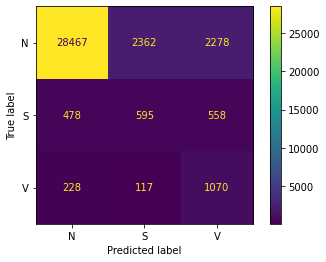

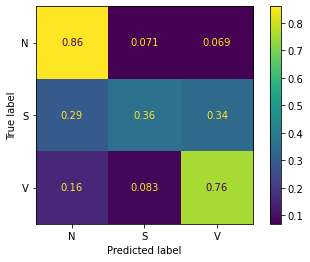

In [ ]:
#Plotting the confusion matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix

ConfusionMatrixDisplay.from_predictions(y, y_pred, labels = ['N', 'S', 'V'])
ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true', labels = ['N', 'S', 'V'])

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           N       0.98      0.86      0.91     33107
           S       0.19      0.36      0.25      1631
           V       0.27      0.76      0.40      1415

    accuracy                           0.83     36153
   macro avg       0.48      0.66      0.52     36153
weighted avg       0.91      0.83      0.86     36153



# Evaluation on test set patients

In [135]:
test=['S038_128.mat', 'S012_128.mat', 'S095_250.mat', 'S052_128.mat',
       'S049_128.mat', 'S084_250.mat', 'S024_128.mat', 'S087_250.mat',
       'S040_128.mat', 'S105_250.mat', 'S037_128.mat']

In [136]:
# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
filenames_test = list()
ecgs_test = list()
rpks_test = list()
anns_test = list()

for i in range(len(test)):
  ecg, rpk, ann = load_data(input_dir+'/'+test[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, len(test)),
        end=""
    )
  ecgs_test.append(ecg)
  rpks_test.append(rpk)
  anns_test.append(ann)
  filenames_test.append(input_dir+'/'+test[i])

Loading file: 11/11

In [137]:
# Resample signals to 250Hz
resampled_ecg_1_test = []
resampled_ecg_2_test = []
for i in range(len(ecgs_test)):
   secs_1 = len(ecgs_test[i]['ecg'][:,0])/ecg_freq(filenames_test[i]) # Number of seconds in signal X
   secs_2 = len(ecgs_test[i]['ecg'][:,1])/ecg_freq(filenames_test[i]) # Number of seconds in signal X
   samps_1 = secs_1*250     # Number of samples to downsample
   samps_2 = secs_2*250
   resampled_ecg_1_test.append(scipy.signal.resample(ecgs_test[i]['ecg'][:,0] , int(samps_1))) 
   resampled_ecg_2_test.append(scipy.signal.resample(ecgs_test[i]['ecg'][:,1] , int(samps_2))) 

In [138]:
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = scipy.signal.firwin(12, 35/125, fs = 250)

In [139]:
mf600 = int(250 * 0.6) - 1
mf200 = int(250 * 0.2) - 1
for i in range(len(resampled_ecg_1_test)):
  resampled_ecg_1_test[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_1_test[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_1_test[i], mf200), mf600))
  resampled_ecg_2_test[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_2_test[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_2_test[i], mf200), mf600))

In [140]:
heartbeats_test_1 = []
heartbeats_test_2 = []

for i in range(len(ecgs_test)):
  for j in range(len(rpks_test[i]['rpeaks'])):
   if(from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i])) < win or from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  + win > from_freq_to_freq(rpks_test[i]['rpeaks'][-1],ecg_freq(filenames_test[i]))): #skipping beats that are too much close to the initial and to the end of the signal 
    anns_test[i]['labels'][j] = 'A'
   else: 
    heartbeats_test_1.append(resampled_ecg_1_test[i][from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  - win : from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  + win])
    heartbeats_test_2.append(resampled_ecg_2_test[i][from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  - win : from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  + win])

In [141]:
labels_test = []

for i in range(len(ecgs_test)):
  for j in range(len(anns_test[i]['labels'])):
    if(anns_test[i]['labels'][j] != 'A'):
     labels_test.append(anns_test[i]['labels'][j])

In [142]:
integer_encoded = label_encoder.fit_transform(labels_test)

#One hot encoding of the target values
ohe = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_ohe_test = ohe.fit_transform(integer_encoded)

In [166]:
y_test = target_ohe_test

In [167]:
X_test_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_test_1, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
X_test_2 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_test_2, maxlen=win * 2, dtype='float32', truncating='post',padding="post")

In [168]:
X_test = []
for i in range(len(X_test_1)):
  X_test.append([X_test_1[i], X_test_2[i]])

X_test = np.asarray(X_test)

In [ ]:
#Only lead 1
X_test = np.asarray(X_test_1)

# Normalization for 1 lead only
X_test = (X_test - mean)/std
mean, std

In [169]:
# Normalization for both 2 leads
X_test[:,0] = (X_test[:,0] - mean[0])/std[0]
X_test[:,1] = (X_test[:,1] - mean[1])/std[1]

X_test = np.swapaxes(X_test, 1, 2)
X_test.shape

(25939, 500, 2)

(25939, 500)

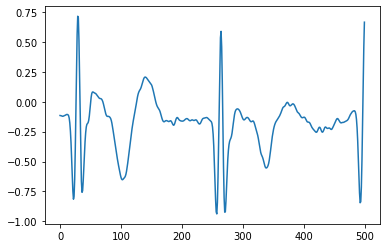

In [ ]:
plt.plot(X_test[900])
X_test.shape

In [170]:
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [171]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix

#utility to plot confusion matrix and evaluation metrics
def evaluate_on_test(model, batch_size, test_to_use):
  #Computing the prediction of the model on the test set
  predictions = []
  for element in test_to_use.batch(batch_size).as_numpy_iterator():
      predictions.append(model.predict(element[0]))
  
  predictions_f = [item for sublist in predictions for item in sublist]

  predictions_oh = []
  #transform prediction into one-hot-encoding 
  for i in range(len(predictions_f)):
      predictions_oh.append(tf.one_hot(tf.argmax(predictions_f[i]), depth=3))
  
  #Compute the true and prediction array in order to plot the confusion matrix
  y = []

  for y_t in y_test.tolist():
      if(y_t == [1, 0, 0]):
          y.append('N')
      if(y_t == [0, 1 ,0]):
          y.append('S')
      if(y_t == [0, 0 ,1]):
          y.append('V')    

  y_pred = []

  for y_t in predictions_oh:
      if(all(tf.equal(y_t, tf.constant([1, 0, 0], dtype=np.float32)))):
          y_pred.append('N')
      elif(all(tf.equal(y_t, tf.constant([0, 1, 0], dtype=np.float32)))):
          y_pred.append('S')
      elif(all(tf.equal(y_t, tf.constant([0, 0, 1], dtype=np.float32)))):
          y_pred.append('V')  
      else:
          print(y_t)

  # Plot confusion matrix and metrics
  ConfusionMatrixDisplay.from_predictions(y, y_pred, labels = ['N', 'S', 'V'])
  ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true', labels = ['N', 'S', 'V'])

  print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           N       0.99      0.95      0.97     23764
           S       0.44      0.83      0.58      1235
           V       0.78      0.76      0.77       940

    accuracy                           0.94     25939
   macro avg       0.74      0.85      0.77     25939
weighted avg       0.96      0.94      0.95     25939



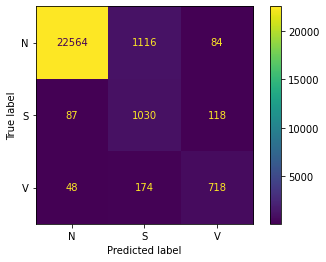

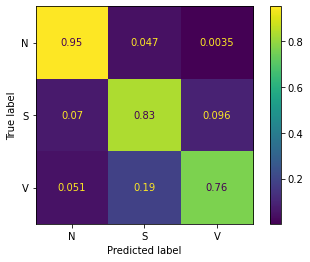

In [172]:
evaluate_on_test(vgg, 32, test_data) #2 leads

              precision    recall  f1-score   support

           N       0.99      0.93      0.96     23764
           S       0.39      0.91      0.54      1235
           V       0.95      0.68      0.79       940

    accuracy                           0.92     25939
   macro avg       0.78      0.84      0.77     25939
weighted avg       0.96      0.92      0.94     25939



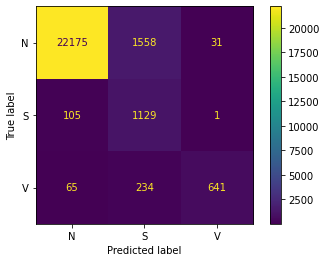

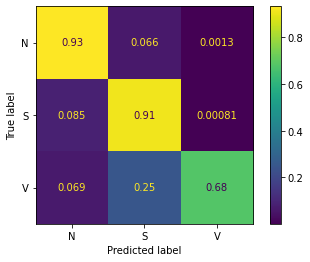

In [ ]:
evaluate_on_test(vgg, 32, test_data)

# Explainability through CAM (Class Activation Map) and LIME

In this section we want to make results of our deep model more interpretable using Class Activation Map, which give us an indication about which part of the input influence more its final classification. We try to use Grad-CAM, an extension of simple CAM that can be used with all kinds of CNN models

Use our previous vgg model to create CAM

In [118]:
# Load our pre-trained model
#model = tf.keras.models.load_model('/content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/vgg_resampling_1lead(actual best)')
model = vgg
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 500, 32)           224       
                                                                 
 conv1d_14 (Conv1D)          (None, 500, 32)           3104      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 250, 64)           6208      
                                                                 
 conv1d_16 (Conv1D)          (None, 250, 64)           12352     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 125, 64)          0         
 1D)                                                  

In [119]:
# utility function that will create the CAM of a single input
def grad_cam(layer, input):
  
  # we extract the output of the last convolutional layer, given an input to the CNN
  grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer).output, model.output])
  last_conv_output, predictions = grad_model(input)

  with tf.GradientTape() as g:
    last_conv_output, predictions = grad_model(input)
    pred_index = tf.argmax(predictions[0])
    class_channel = predictions[:, pred_index]
  
  # compute the gradient of the top predicted class wrt the activations of chosen convolutional layer
  grads = g.gradient(class_channel, last_conv_output)

  pooled_grads = tf.reduce_mean(grads, axis=(0))

  last_conv_output = last_conv_output[0]

  # We finally create the CAM heatmap multiplying the last conv layer output and the gradients computed
  heatmap = last_conv_output * pooled_grads
  heatmap = tf.reduce_mean(heatmap, axis=(1))
  heatmap = np.expand_dims(heatmap, 0)
  return heatmap

Model prediction = S with probability = 0.7980802655220032, True label = S


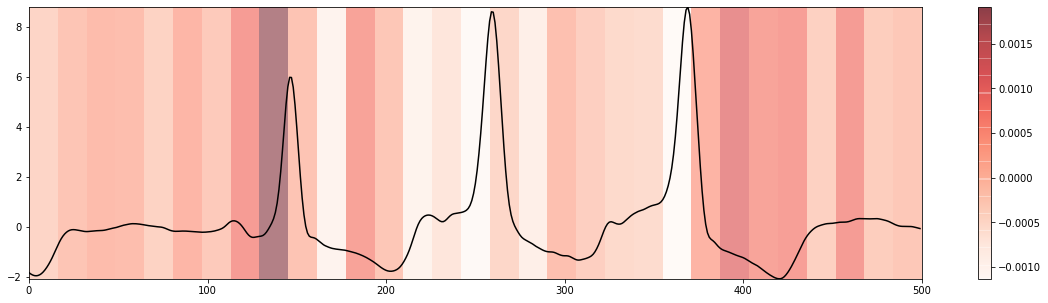

In [ ]:
# try to plot a CAM

# take into consideration the last convolutional layer of the model
layer_considered = "conv1d_12"
labels = ['N', 'S', 'V']
max_len = win*2

# beat of validation set to plot
input_index = 2000
input = np.expand_dims(X_val[input_index], 0)

pred_probs = []
for i in range(3):
  pred_ci = model.predict(input)[0][i]
  pred_probs.append(pred_ci)

# obtain the predicted label of our input
label_index = pred_probs.index(max(pred_probs))
true_label_index = ohe.inverse_transform(y_val[input_index ].reshape(1, -1))[0]

#compute heatmap for our input
heatmap = grad_cam(layer_considered, input)

# plotting heatmap over the beat sample
print(f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")

plt.figure(figsize=(20, 5))
plt.imshow(heatmap, cmap='Reds', aspect="auto", interpolation='nearest', extent=[0, max_len, input.min(), input.max()], alpha=0.5)
plt.plot(input.reshape(max_len), 'k')
plt.colorbar()
plt.show()

We now try an other explainabilty technique called LIME

In [120]:
# utility class
class model_wrapper:
  def __init__(self, model):
    self.model = model
  
  def predict(self, input_data):
    self.pred = self.model.predict(input_data).ravel()
    return np.array([self.pred]).reshape(input_data.shape[0], 3)

In [121]:
wrapped_model = model_wrapper(model) 

In [122]:
!pip install lime

     |████████████████████████████████| 275 kB 9.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=72564b502e15375a764b39692ac70b8a8bb18681bfc880a38ec0c8990725f0fd
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
# only if lead 1 only
X_train = X_train.reshape(-1, max_len, 1)
X_train.shape

(145732, 500, 1)

In [123]:
# create a lime object with our data

import lime
from lime import lime_tabular

# we use the Recurrent Tabular Explainer for our CNN model
explainer = lime_tabular.RecurrentTabularExplainer(X_train, training_labels=tf.keras.utils.to_categorical(y_train), feature_names=["beat sample"], discretize_continuous=False, feature_selection='auto', class_names=['N','S','V'])

Model prediction = S with probability = 0.7980802655220032, True label = S


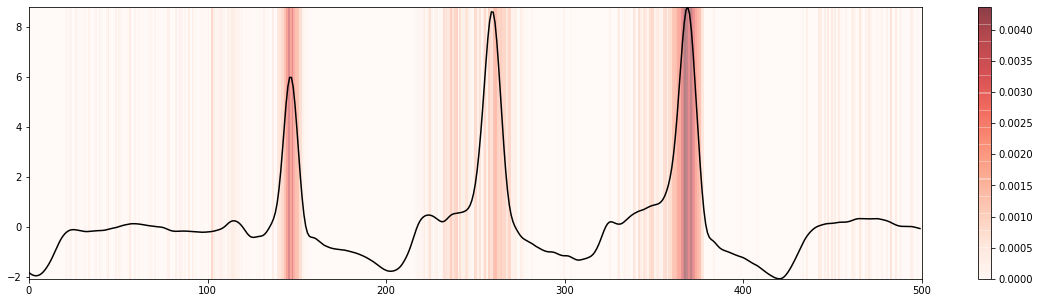

In [ ]:
# try to plot lime heatmap

# take into consideration the last convolutional layer of the model
labels = ['N', 'S', 'V']
max_len = win*2

# beat of validation set to plot
input_index = 2000
input = np.expand_dims(X_val[input_index], axis=0)

pred_probs = []
for i in range(3):
  pred_ci = model.predict(input)[0][i]
  pred_probs.append(pred_ci)

# obtain the predicted label of our input
label_index = pred_probs.index(max(pred_probs))
true_label_index = ohe.inverse_transform(y_val[input_index ].reshape(1, -1))[0]

#compute heatmap for our input
exp = explainer.explain_instance(input, wrapped_model.predict, num_features=max_len, labels=[0, 1, 2])
explanations = exp.as_list(label=label_index)

# creating our heatmap of explanations
heatmap = np.zeros([1,max_len])
for i, k in enumerate(explanations):
  if k[1] > 0:
    heatmap[0, (max_len-1) - int(k[0].split("-")[-1])] = k[1]

# plotting heatmap over the beat sample
print(f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")
plt.figure(figsize=(20, 5))
plt.imshow(heatmap, cmap='Reds', aspect="auto", interpolation='nearest', extent=[0, max_len, input.min(), input.max()], alpha=0.5)
plt.plot(input.reshape(max_len), 'k')
plt.colorbar()
plt.show()

### Explainability if 2 leads are used

Model prediction = S with probability = 0.9786145091056824, True label = S


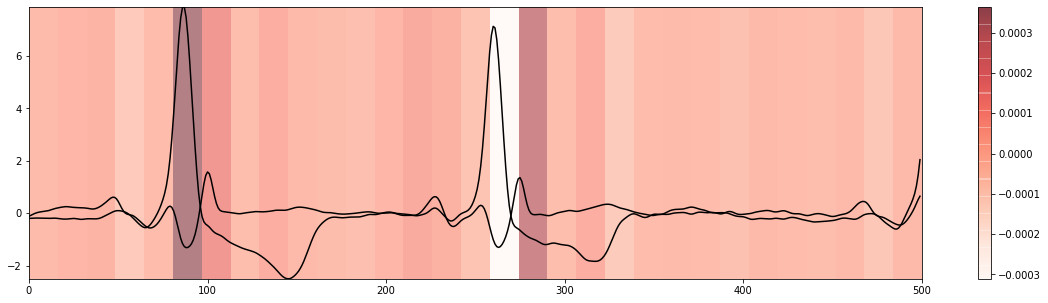

In [131]:
# try to plot a CAM

# take into consideration the last convolutional layer of the model
layer_considered = "conv1d_25"
labels = ['N', 'S', 'V']
max_len = win*2

# beat of validation set to plot
input_index = 1000
input = np.expand_dims(X_val[input_index], 0)

pred_probs = []
for i in range(3):
  pred_ci = model.predict(input)[0][i]
  pred_probs.append(pred_ci)

# obtain the predicted label of our input
label_index = pred_probs.index(max(pred_probs))
true_label_index = ohe.inverse_transform(y_val[input_index ].reshape(1, -1))[0]

#compute heatmap for our input
heatmap = grad_cam(layer_considered, input)

# plotting heatmap over the beat sample
print(f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")

plt.figure(figsize=(20, 5))
plt.imshow(heatmap, cmap='Reds', aspect="auto", interpolation='nearest', extent=[0, max_len, input.min(), input.max()], alpha=0.5)
plt.plot(input.reshape(max_len, 2), 'k')
plt.colorbar()
plt.show()

In [175]:
explainer = lime_tabular.RecurrentTabularExplainer(X_train, training_labels=tf.keras.utils.to_categorical(y_train), feature_names=["beat_sample_lead_1", "beat_sample_lead_2"], discretize_continuous=False, feature_selection='auto', class_names=['N','S','V'])

Model prediction = S with probability = 0.9999871253967285, True label = S


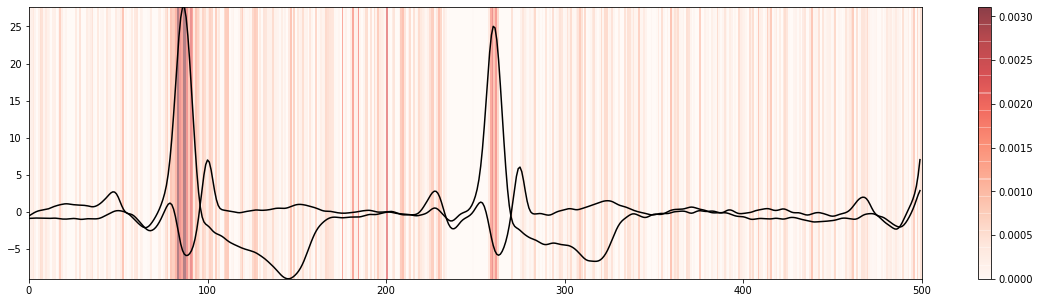

In [176]:
# try to plot lime heatmap

# take into consideration the last convolutional layer of the model
labels = ['N', 'S', 'V']
max_len = win*2

# beat of validation set to plot
input_index = 1000
input = np.expand_dims(X_val[input_index], axis=0)

pred_probs = []
for i in range(3):
  pred_ci = model.predict(input)[0][i]
  pred_probs.append(pred_ci)

# obtain the predicted label of our input
label_index = pred_probs.index(max(pred_probs))
true_label_index = ohe.inverse_transform(y_val[input_index ].reshape(1, -1))[0]

#compute heatmap for our input
exp = explainer.explain_instance(input, wrapped_model.predict, num_features=max_len*2, labels=[0, 1, 2])
explanations = exp.as_list(label=label_index)

#extract explanations of the two different leads
explanations_l1 = []
explanations_l2 = []

for i, e in enumerate(explanations):
  if 'beat_sample_lead_1' in explanations[i][0]:
    explanations_l1.append(e)
  else:
    explanations_l2.append(e)

# creating our heatmap of explanations
heatmap = np.zeros([1,max_len])
for i, k in enumerate(explanations_l1):
  if k[1] > 0:
    heatmap[0, (max_len-1) - int(k[0].split("-")[-1])] = k[1]

for i, k in enumerate(explanations_l2):
  if k[1] > 0:
    heatmap[0, (max_len-1) - int(k[0].split("-")[-1])] += k[1]
    heatmap[0, (max_len-1) - int(k[0].split("-")[-1])] /= 2

# plotting heatmap over the beat sample
print(f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")
plt.figure(figsize=(20, 5))
plt.imshow(heatmap, cmap='Reds', aspect="auto", interpolation='nearest', extent=[0, max_len, input.min(), input.max()], alpha=0.5)
plt.plot(input.reshape(max_len, 2), 'k')
plt.colorbar()
plt.show()